#CART POLE ENVIRONMENT

#IMPORING THE LIBRARIES

In [1]:
import gymnasium as gym
import numpy as np
import time

#SETTING THE ENVIRONMENT

In [2]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

#resetting env and pushing step

In [3]:
state=env.reset()#initial state
print(state)
#it prints x(cart position),x^(cart velocity),0(pole angle),0^(angular velocity)
state=env.step(0)#pushing left side
print(state)
state=env.step(1)#pushing right side
print(state)

(array([-0.00208304,  0.02438773,  0.00335667,  0.01947992], dtype=float32), {})
(array([-0.00159529, -0.17078221,  0.00374626,  0.31322002], dtype=float32), 1.0, False, False, {})
(array([-0.00501093,  0.02428618,  0.01001067,  0.0217209 ], dtype=float32), 1.0, False, False, {})


#showing the image using matplotlib

[-0.00501093  0.02428618  0.01001066  0.0217209 ]


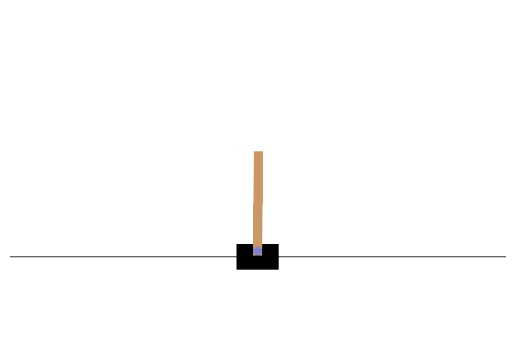

In [7]:
import matplotlib.pyplot as plt
state=env.unwrapped.state#to bring initial state
print(state)
frame=env.render()#render() for visualizing
plt.imshow(frame)#imshow()- image showing
plt.axis('off') #to turn of the axis
plt.show()

#Changing the position of cart

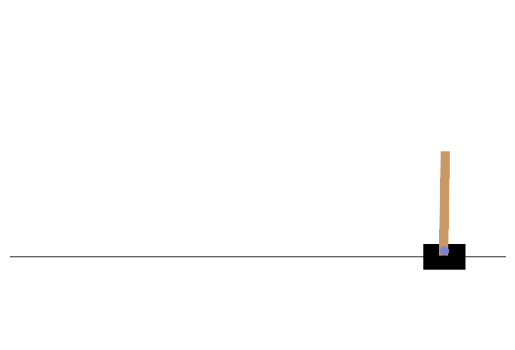

In [8]:
#positive index
state[0]=1.8
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

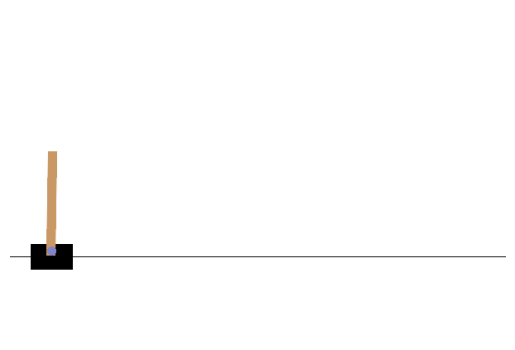

In [9]:
#negative index
state[0]=-2
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

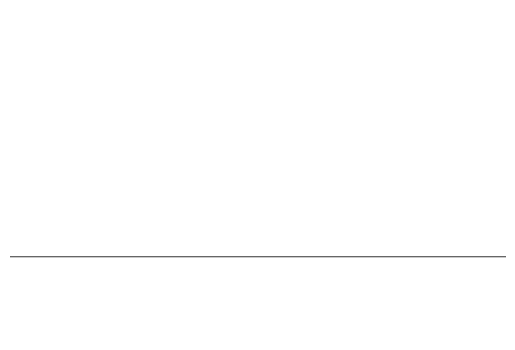

In [10]:
#out of limit (positive)
state[0]=6
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

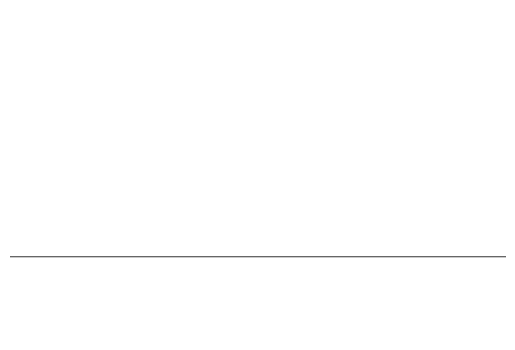

In [11]:
#out of limit (negative)
state[0]=-4
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

#Changing the pole angle

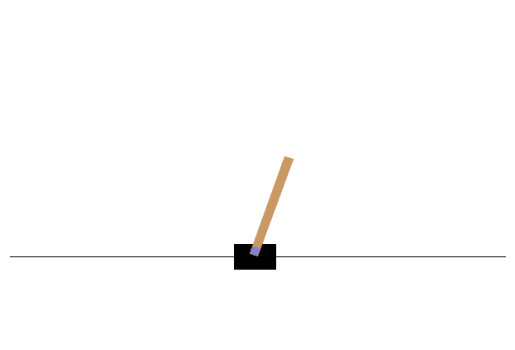

In [12]:
#positive degree
state=env.reset()
state=env.unwrapped.state
state[2]=np.radians(20)
env.unwrapped.state=state
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

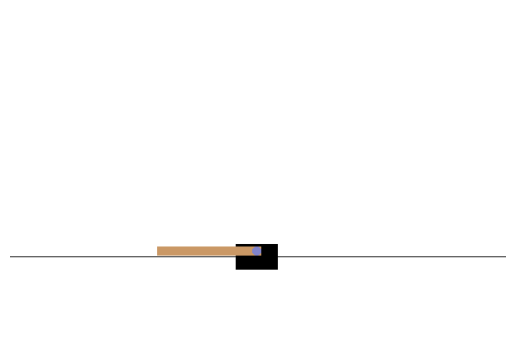

In [13]:
#negative degree
state=env.reset()
state=env.unwrapped.state
state[2]=np.radians(-90)
env.unwrapped.state=state
frame=env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

#observation(it shows range of state)

In [14]:
env.observation_space

Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)

In [16]:
#upper limit
env.observation_space.high

array([4.8       ,        inf, 0.41887903,        inf], dtype=float32)

In [17]:
#lower limit
env.observation_space.low

array([-4.8       ,        -inf, -0.41887903,        -inf], dtype=float32)

In [18]:
env.action_space

Discrete(2)

In [19]:
#specification
env.spec

EnvSpec(id='CartPole-v1', entry_point='gymnasium.envs.classic_control.cartpole:CartPoleEnv', reward_threshold=475.0, nondeterministic=False, max_episode_steps=500, order_enforce=True, disable_env_checker=False, kwargs={'render_mode': 'rgb_array'}, namespace=None, name='CartPole', version=1, additional_wrappers=(), vector_entry_point='gymnasium.envs.classic_control.cartpole:CartPoleVectorEnv')

In [20]:
#maximun number of steps per episode
env.spec.max_episode_steps

500

In [21]:
#how much they can reach(reward threshold)
env.spec.reward_threshold

475.0

In [22]:
env=gym.make("CartPole-v1")

In [23]:
#observation space(storing previous observation in variable)
obs_space=env.observation_space

In [24]:
#extract high and low limit(storing in variable)
high=obs_space.high
low=obs_space.low

In [25]:
#pole angle(3rd index)
max_angle_rad=high[2]
min_angle_rad=low[2]

In [26]:
#convert radians to degreee
max_angle_deg=np.degrees(max_angle_rad)
min_angle_deg=np.degrees(min_angle_rad)
print("===pole angle limits===")
print(f"Max pole angle(radians): {max_angle_rad}")
print(f"Min pole angle(radians): {min_angle_rad}")
print()
print(f"Max pole angle(degrees): {max_angle_deg}°")
print(f"Min pole angle(degrees): {min_angle_deg}°")

===pole angle limits===
Max pole angle(radians): 0.41887903213500977
Min pole angle(radians): -0.41887903213500977

Max pole angle(degrees): 24.0°
Min pole angle(degrees): -24.0°


In [1]:
pip install numpy==1.26.4

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-pack

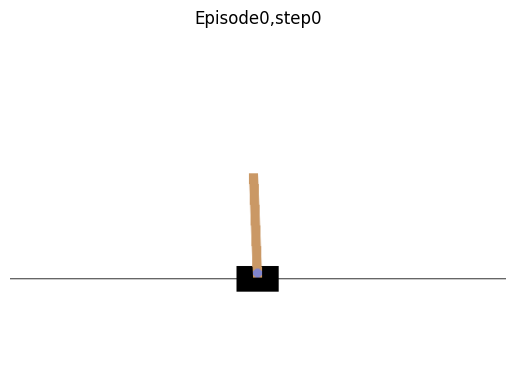

/usr/local/lib/python3.12/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


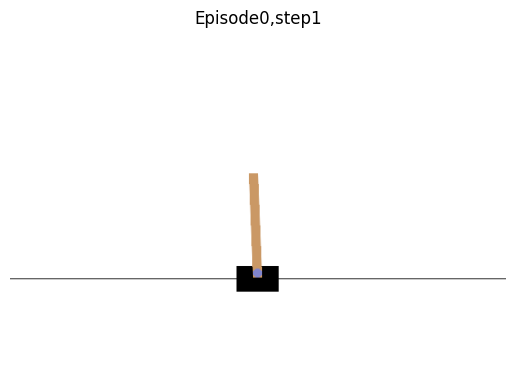

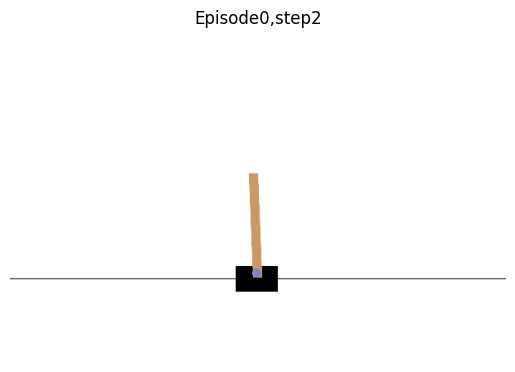

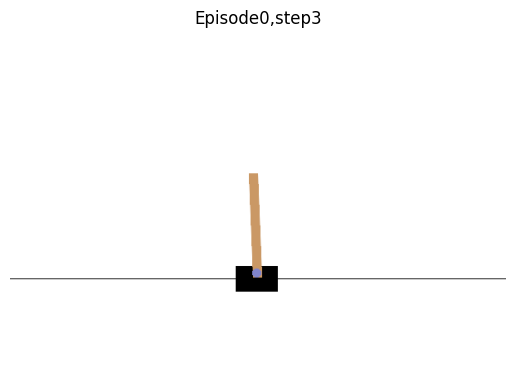

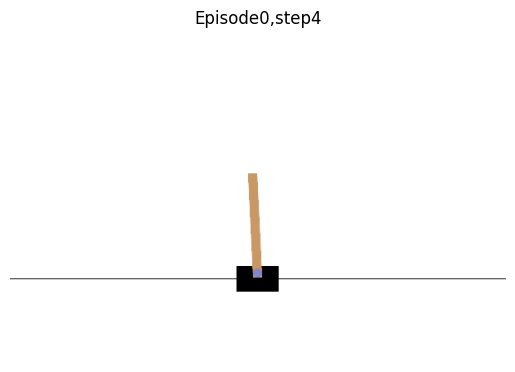

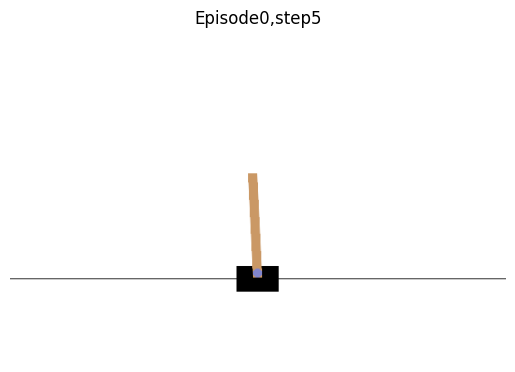

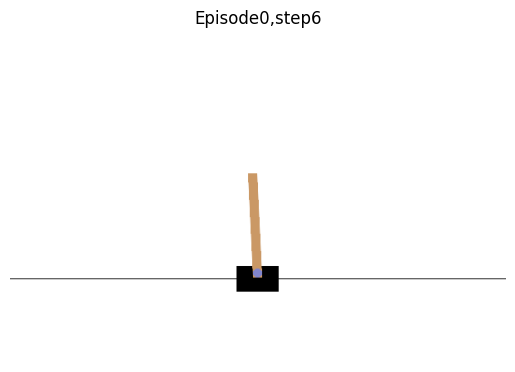

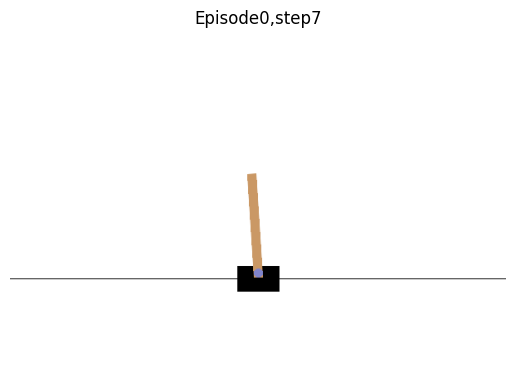

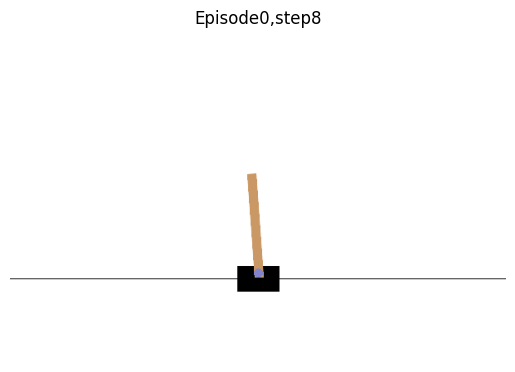

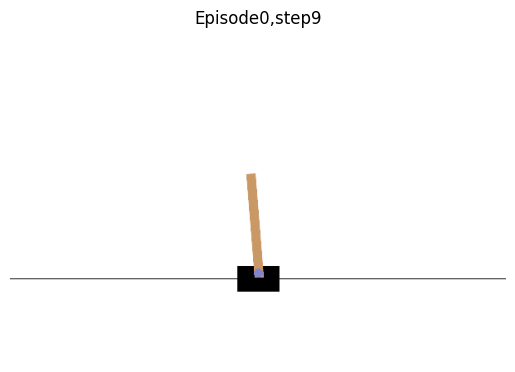

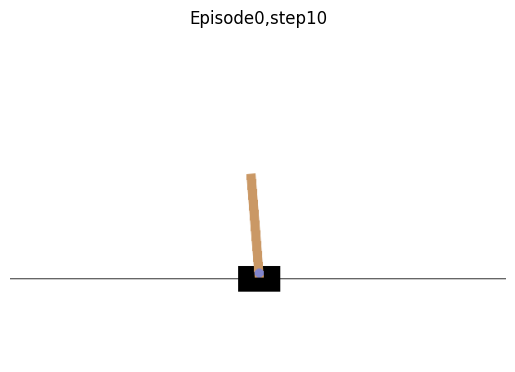

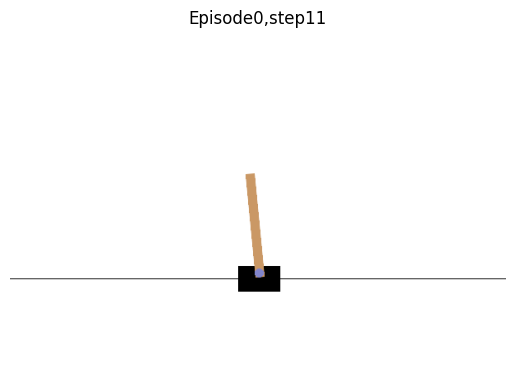

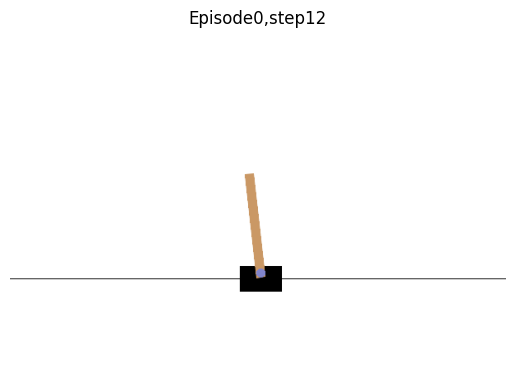

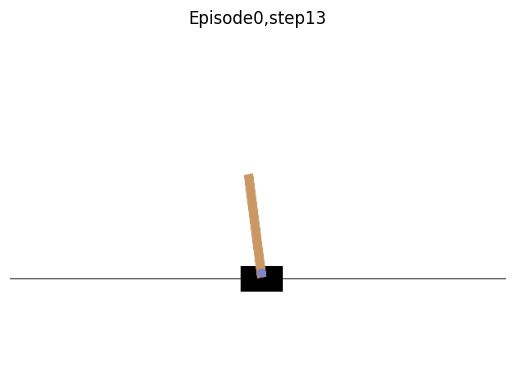

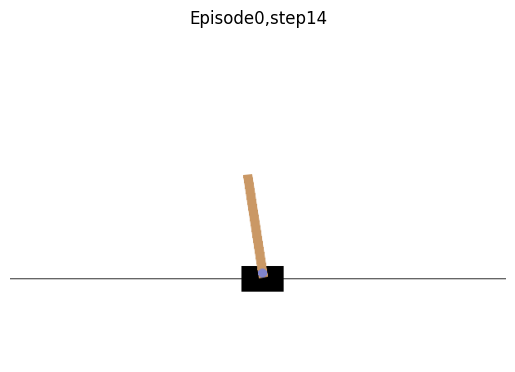

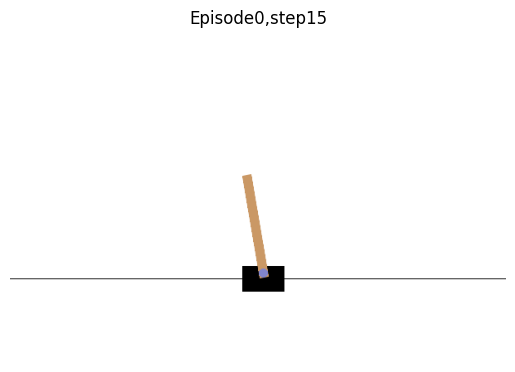

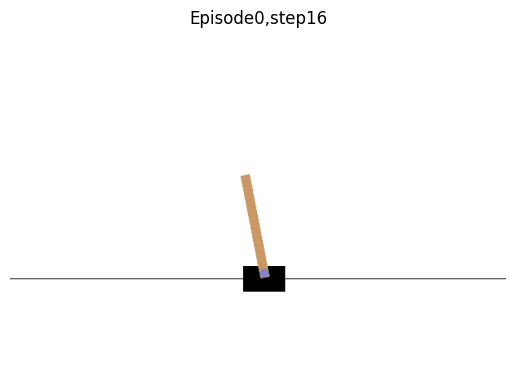

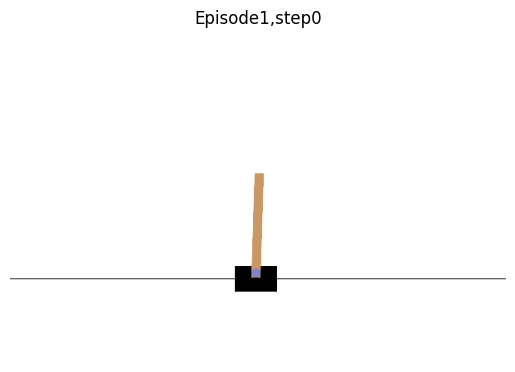

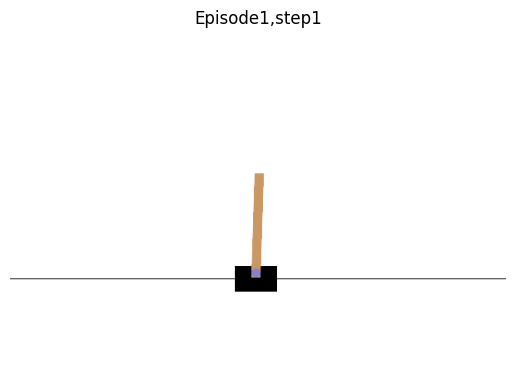

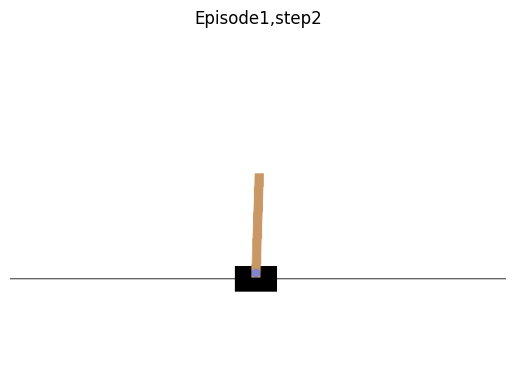

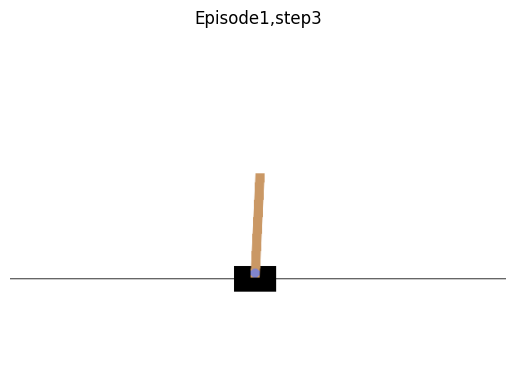

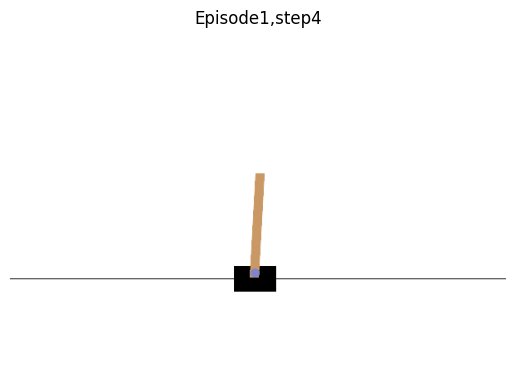

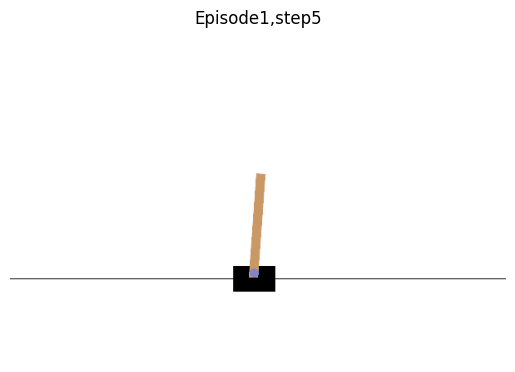

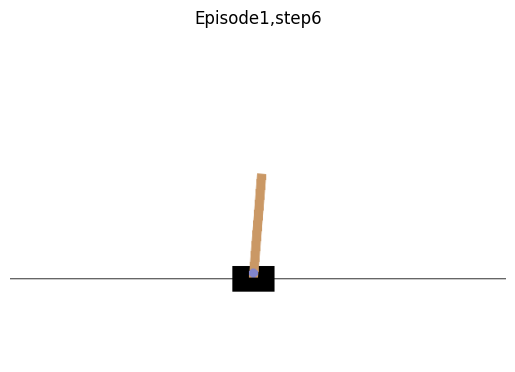

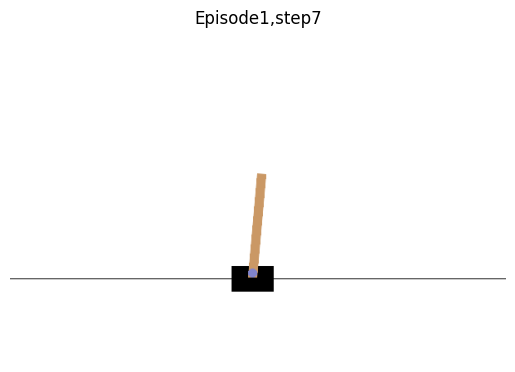

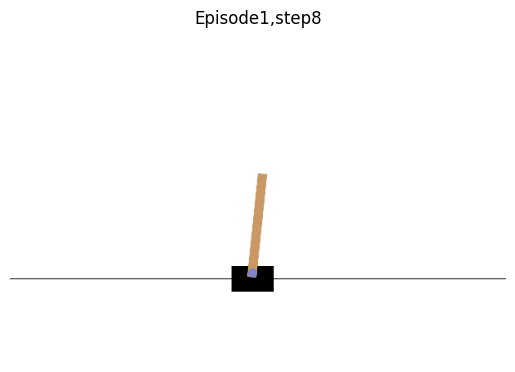

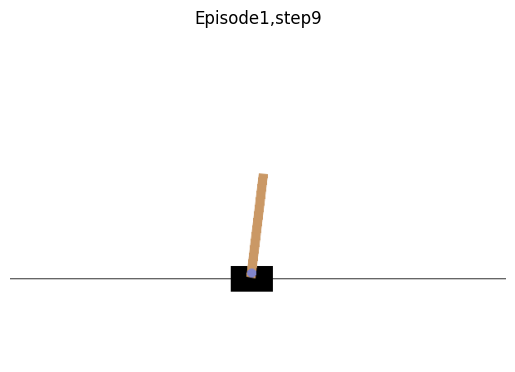

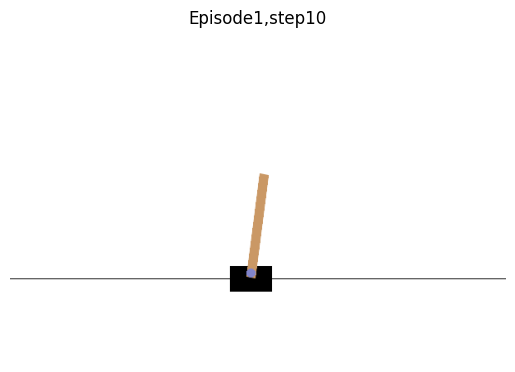

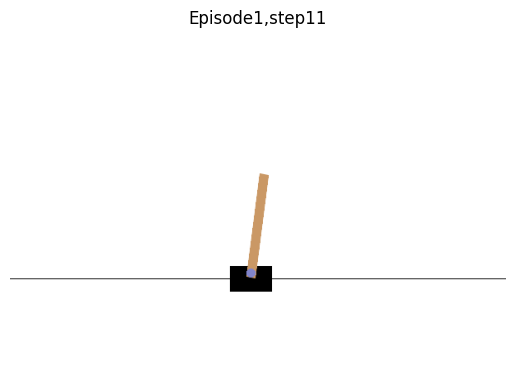

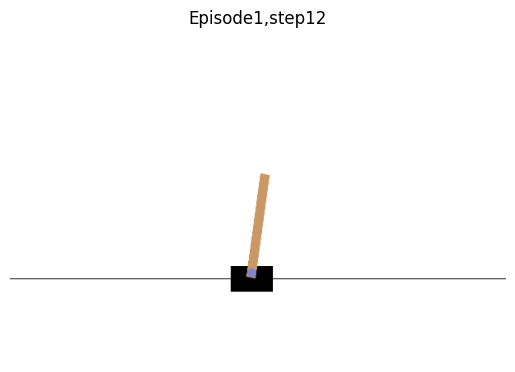

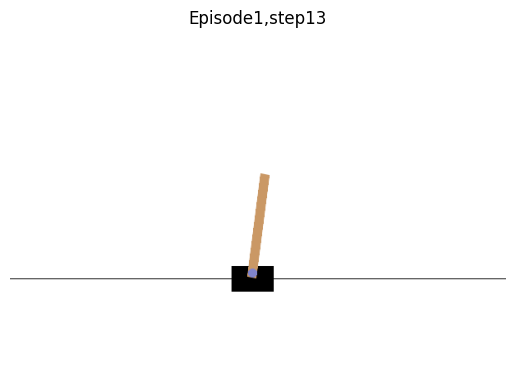

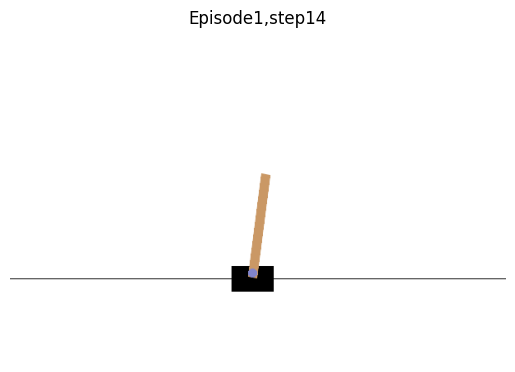

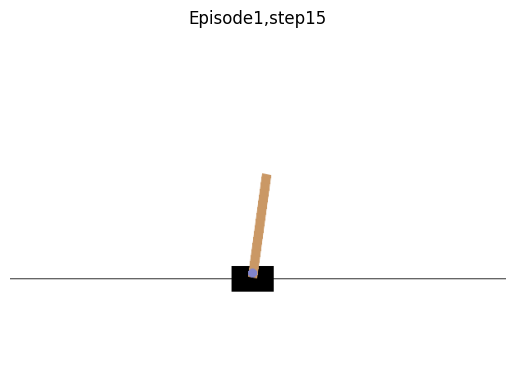

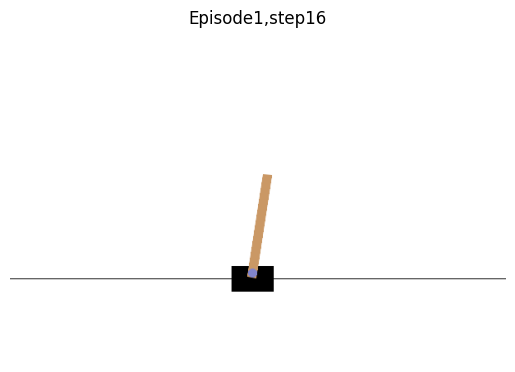

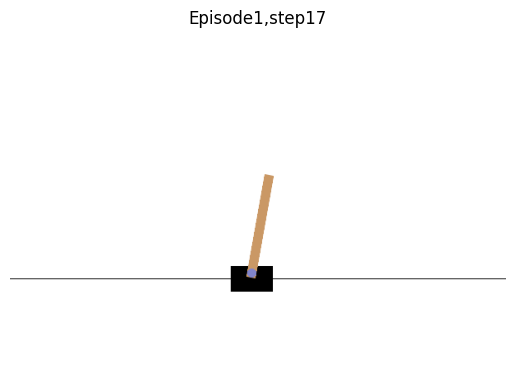

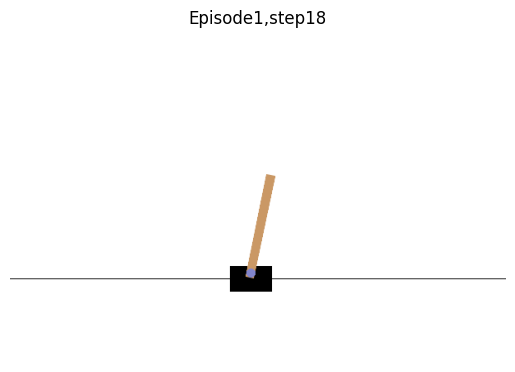

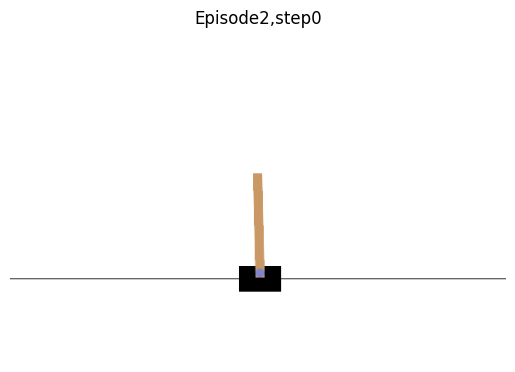

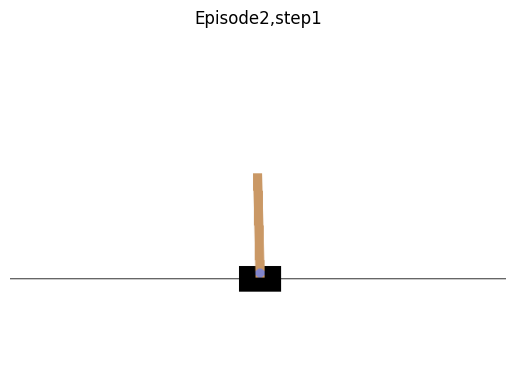

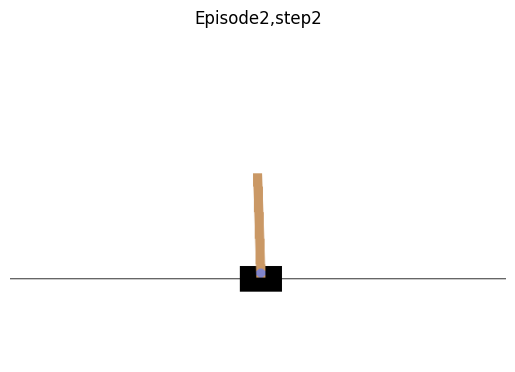

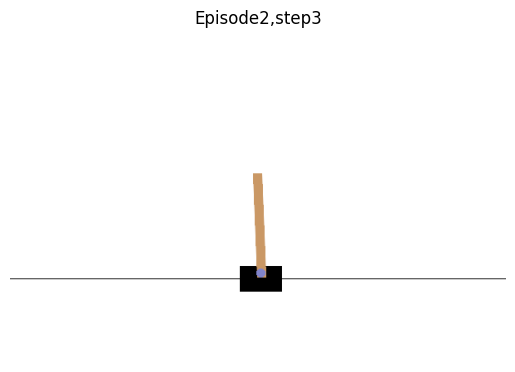

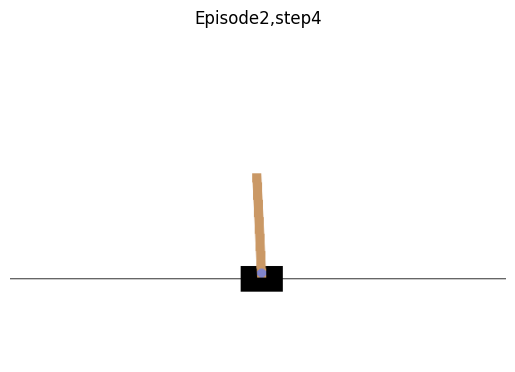

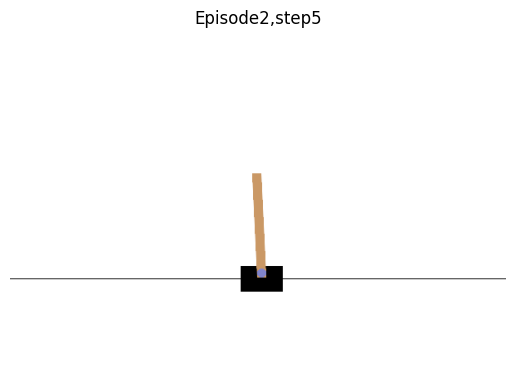

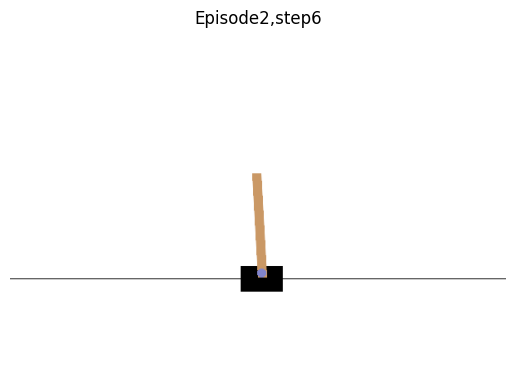

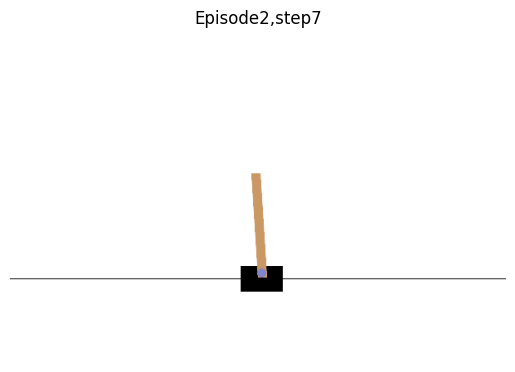

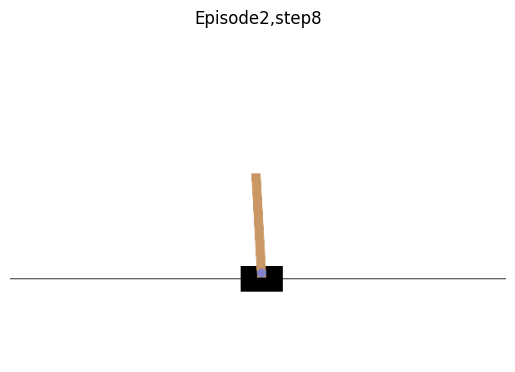

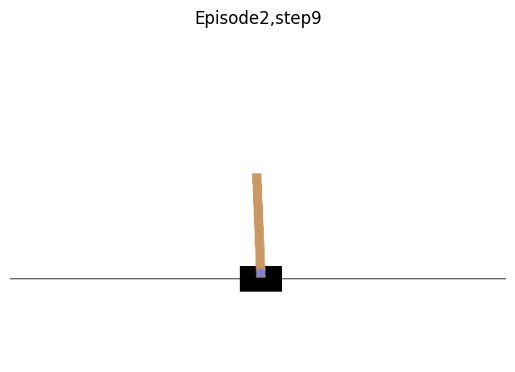

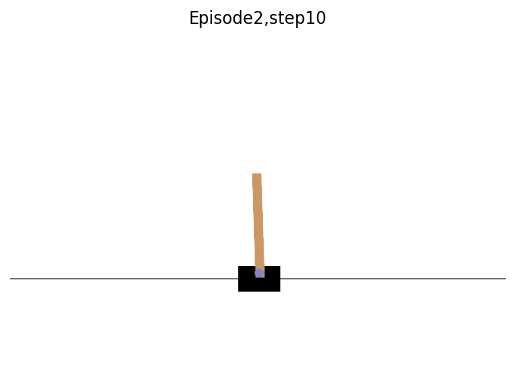

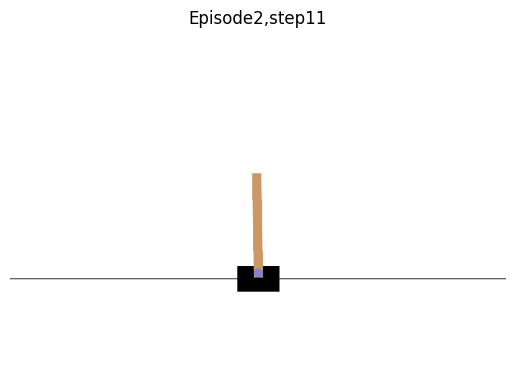

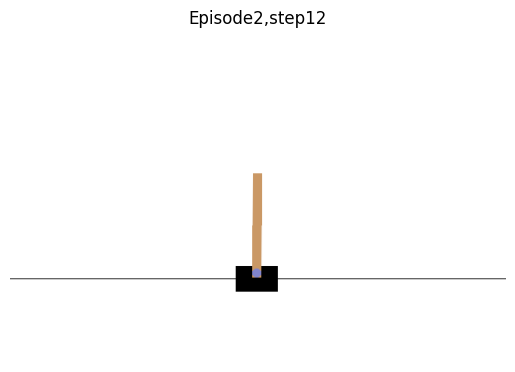

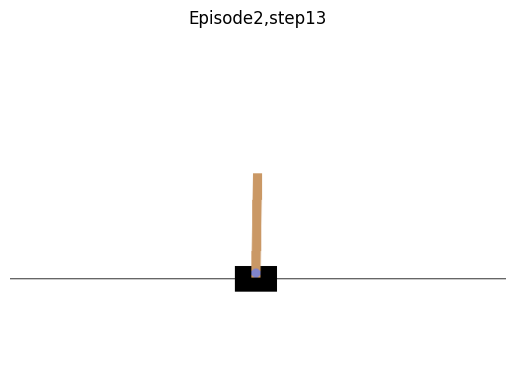

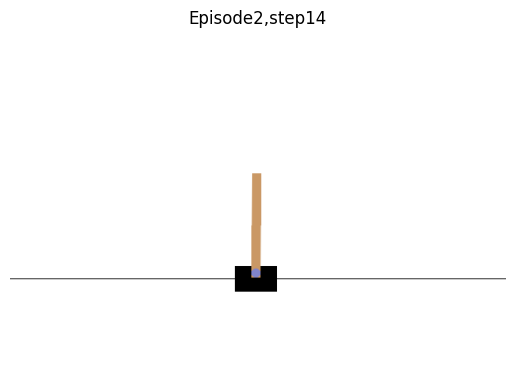

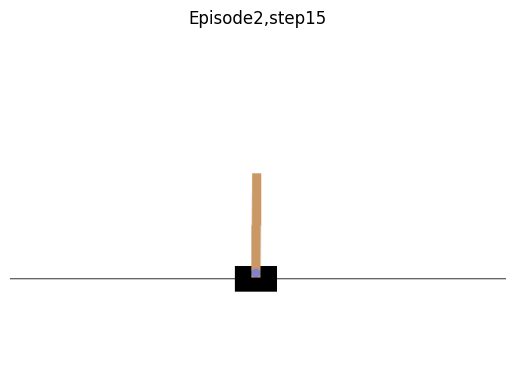

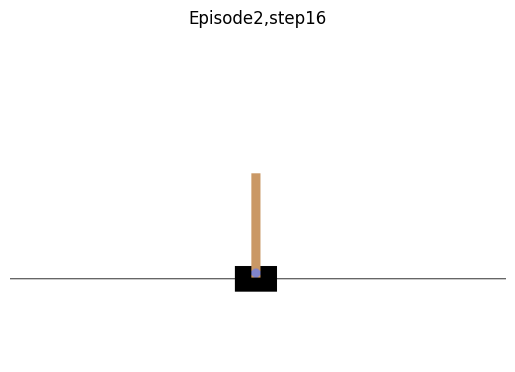

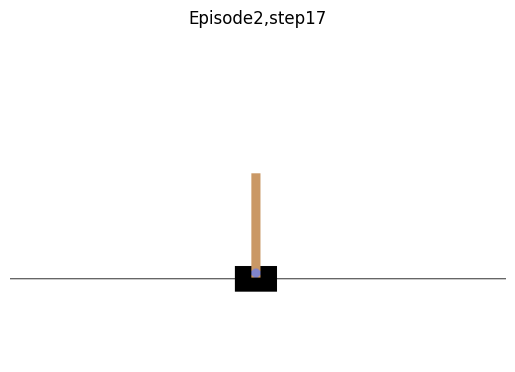

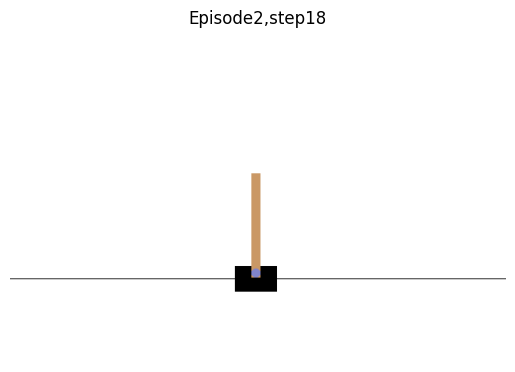

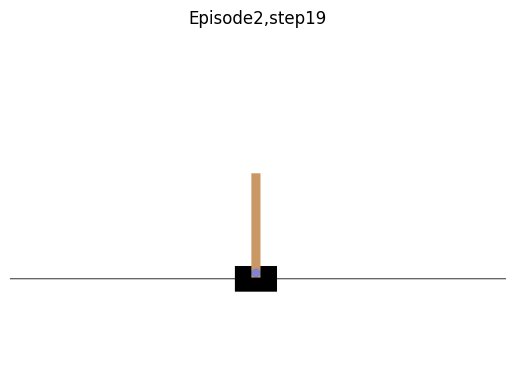

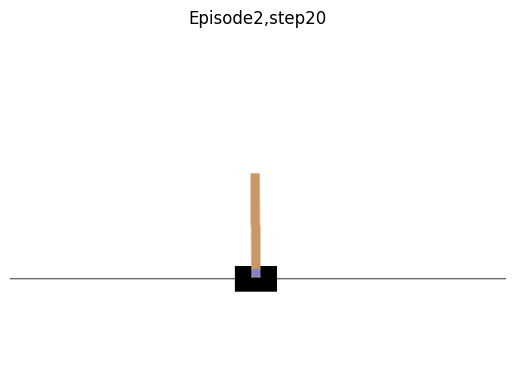

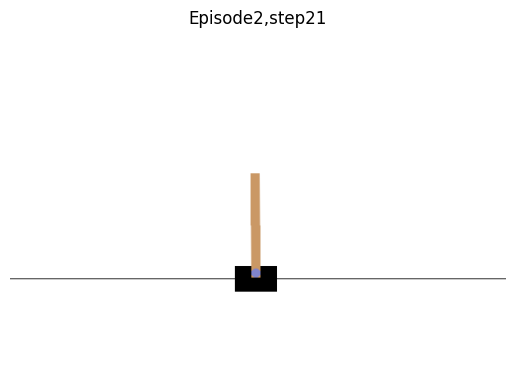

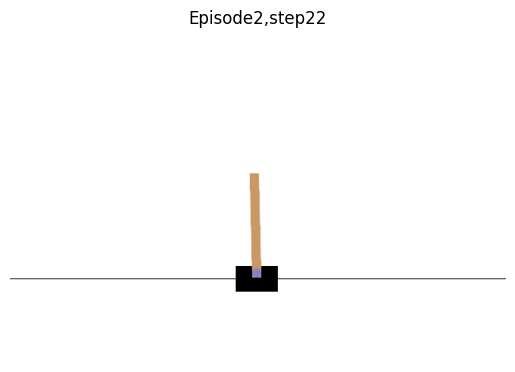

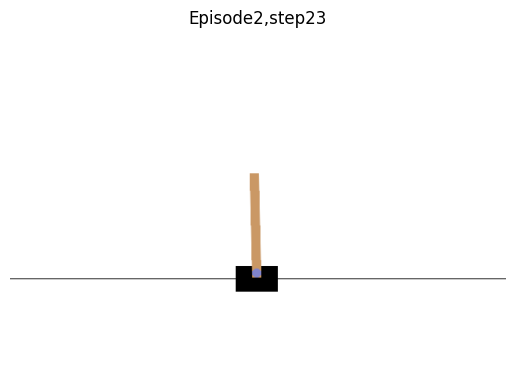

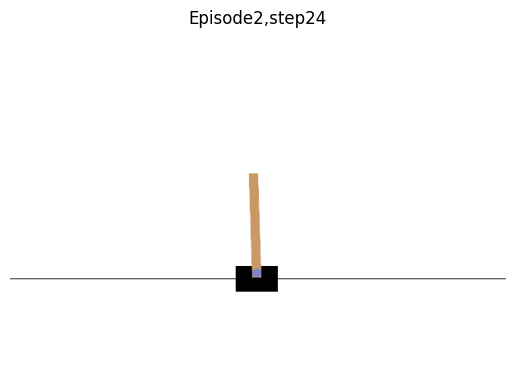

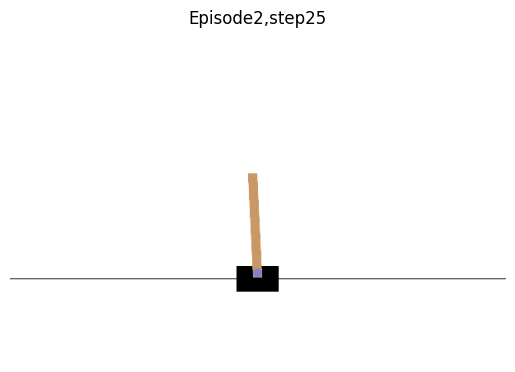

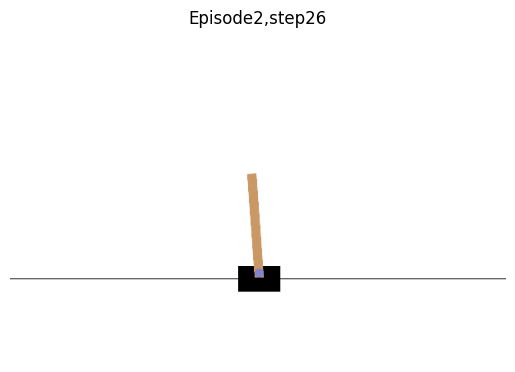

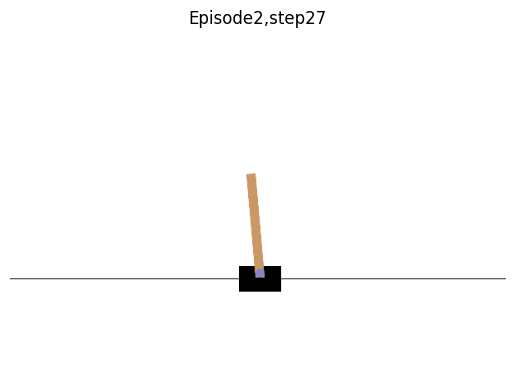

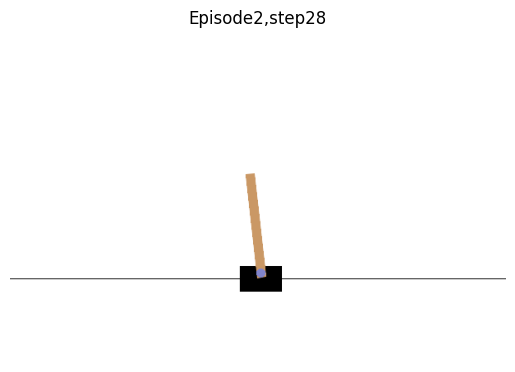

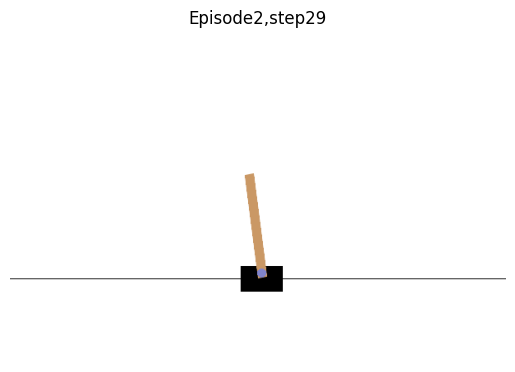

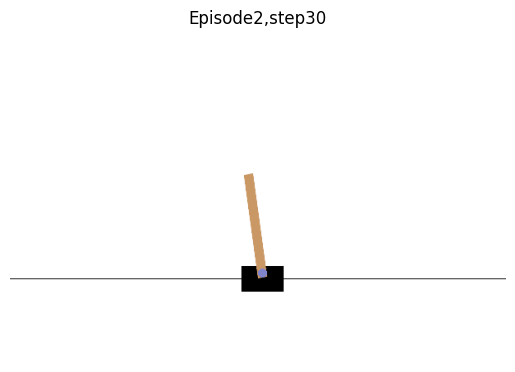

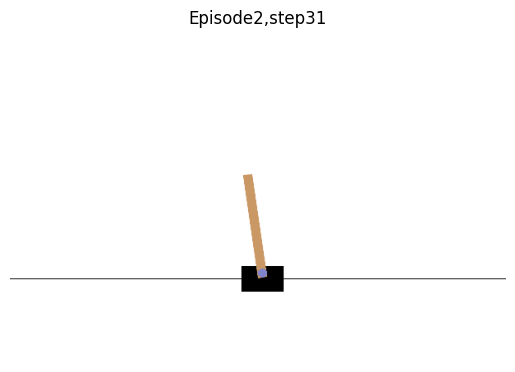

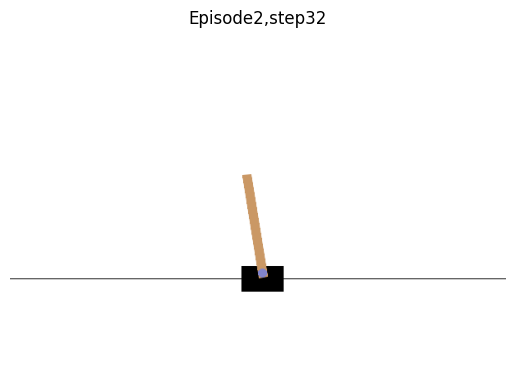

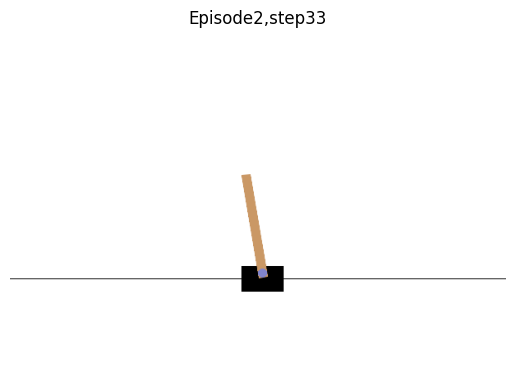

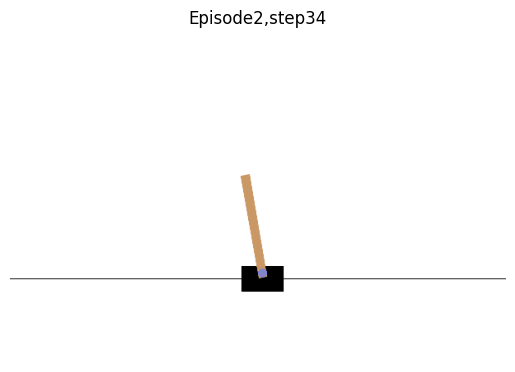

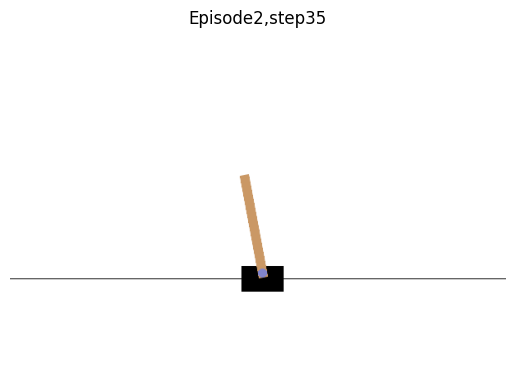

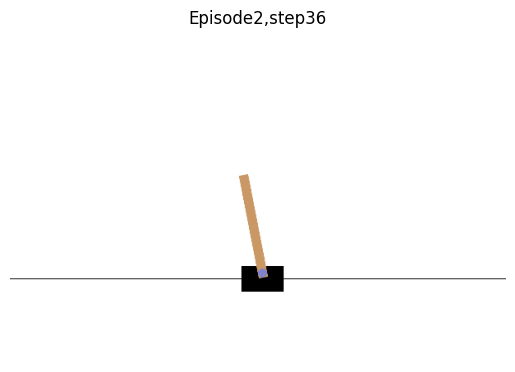

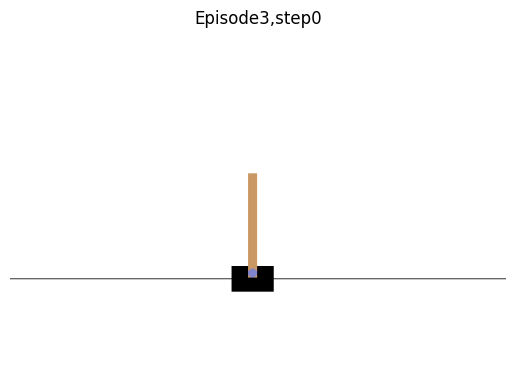

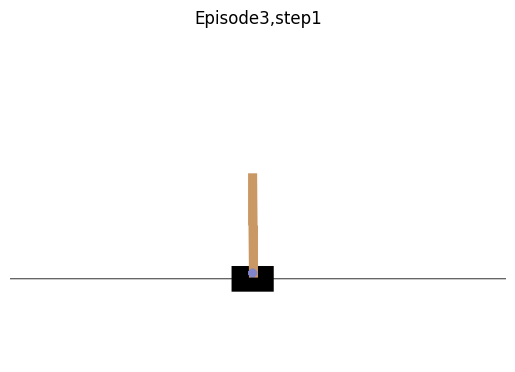

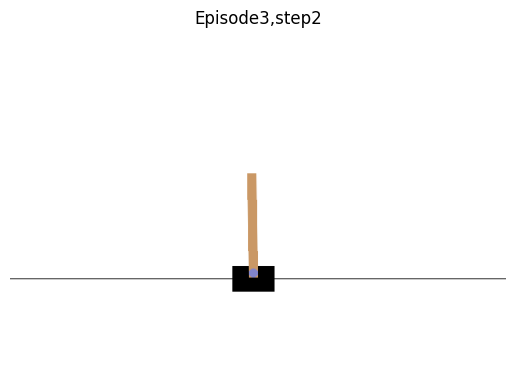

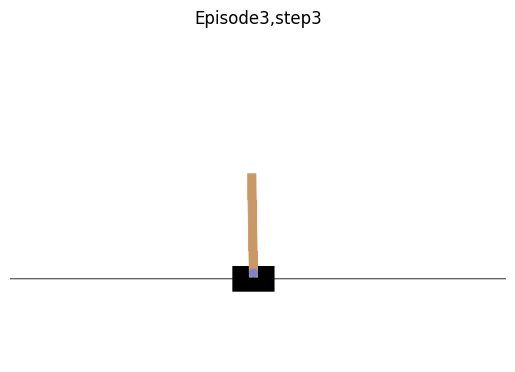

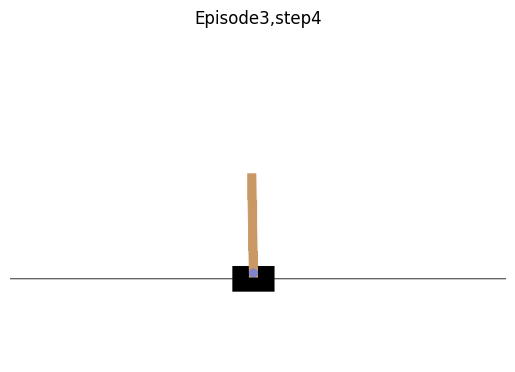

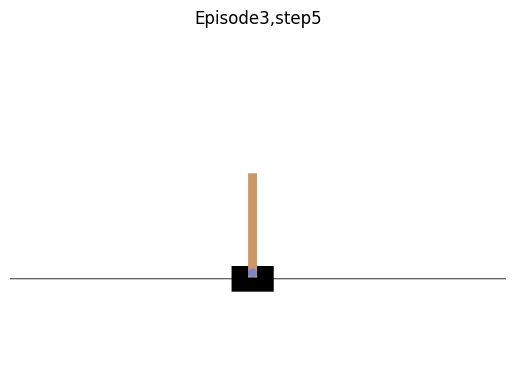

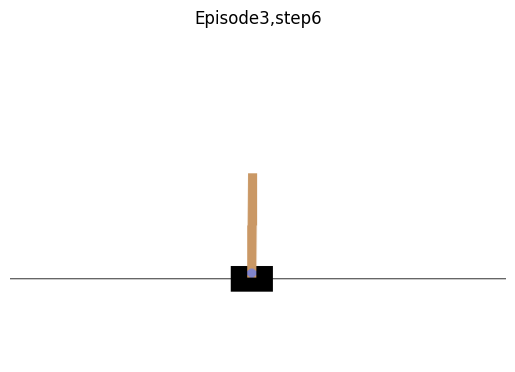

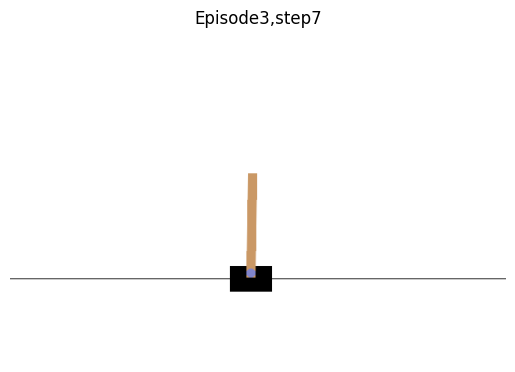

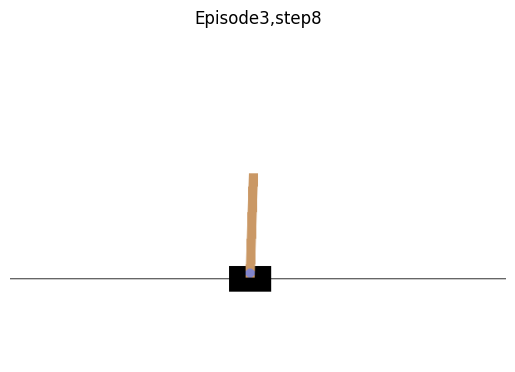

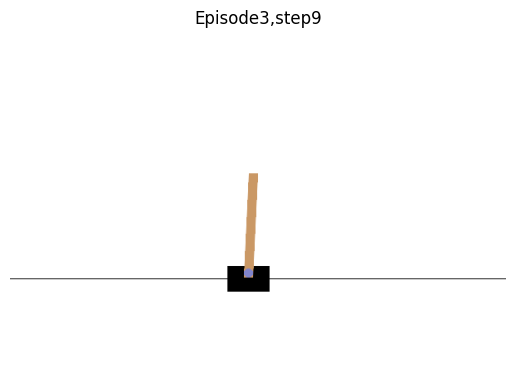

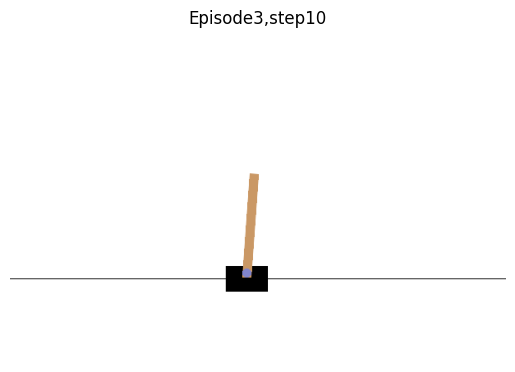

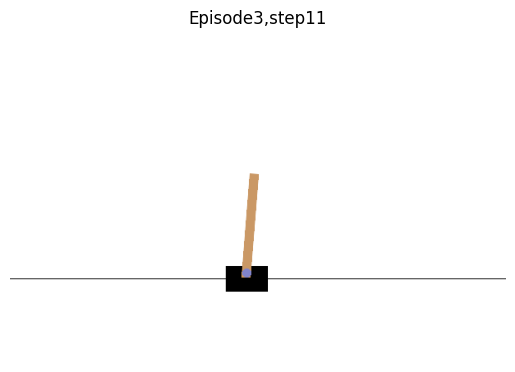

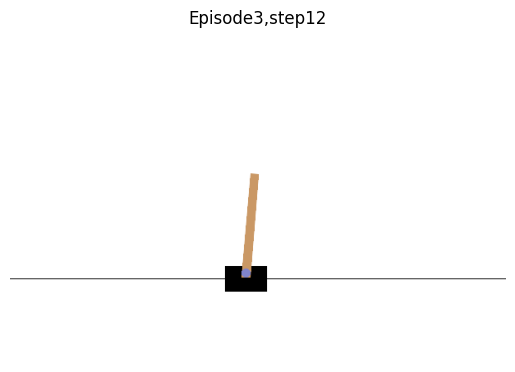

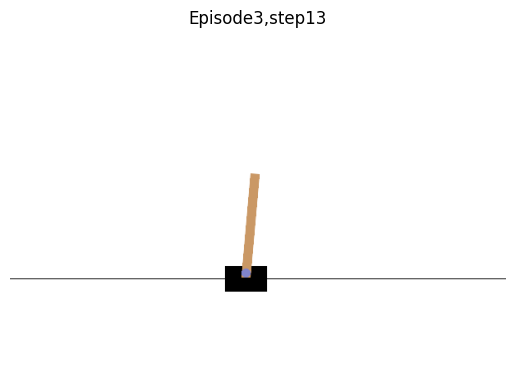

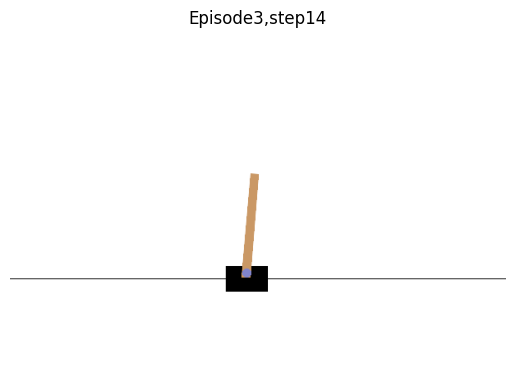

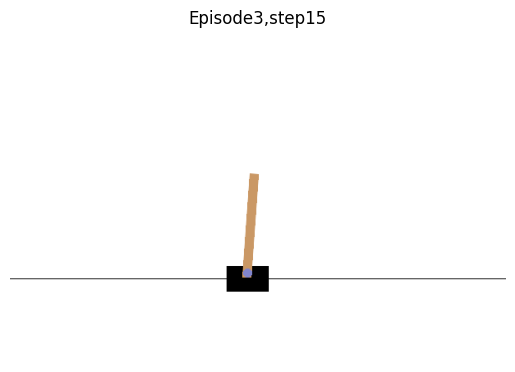

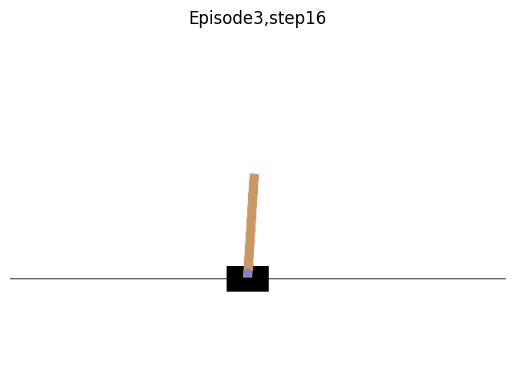

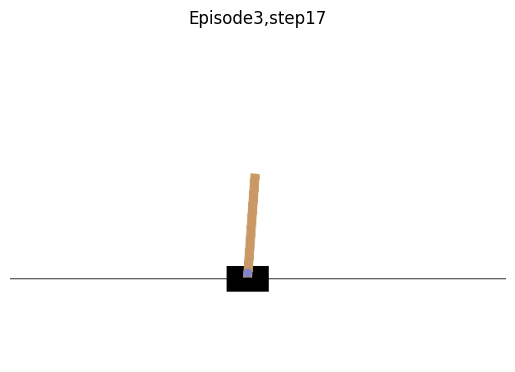

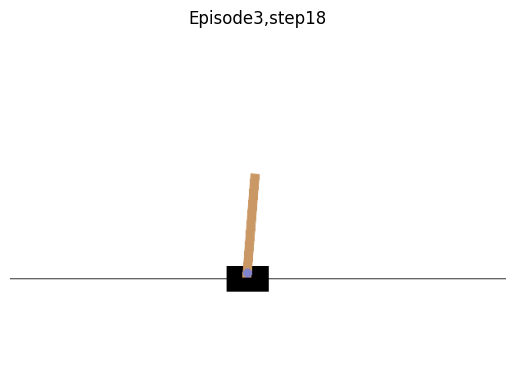

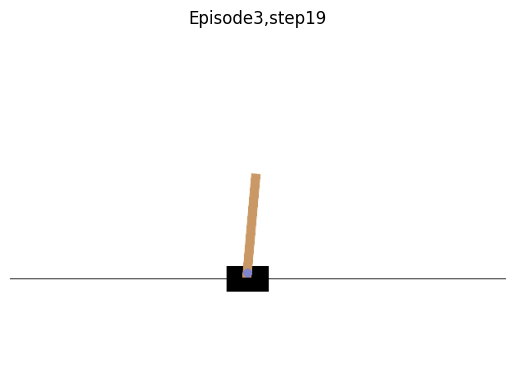

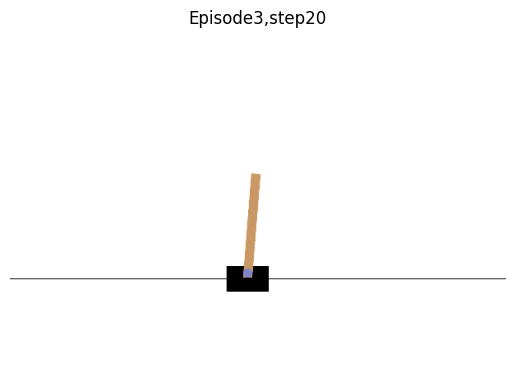

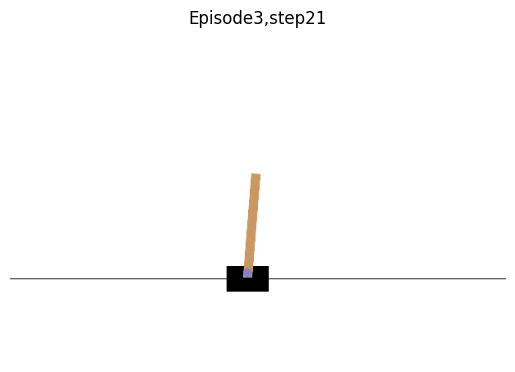

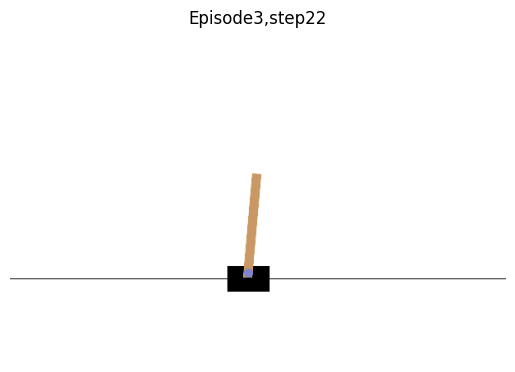

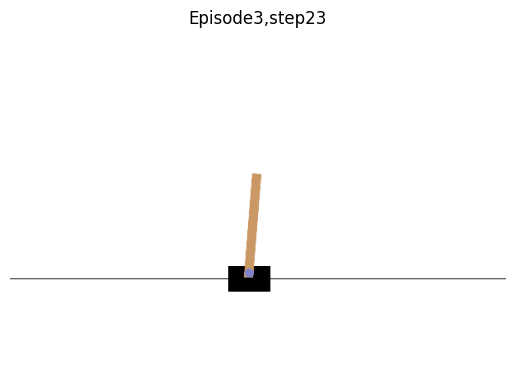

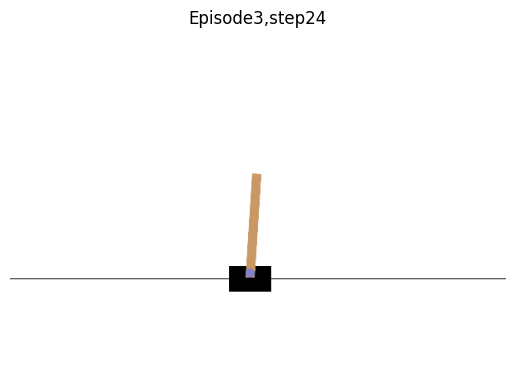

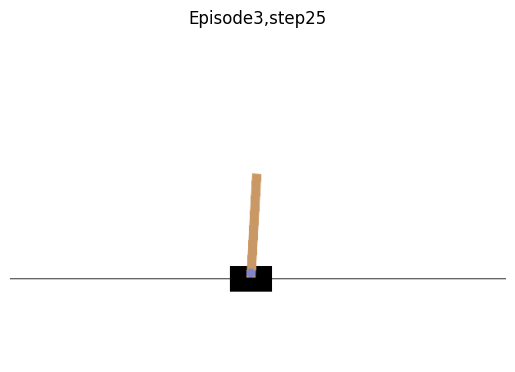

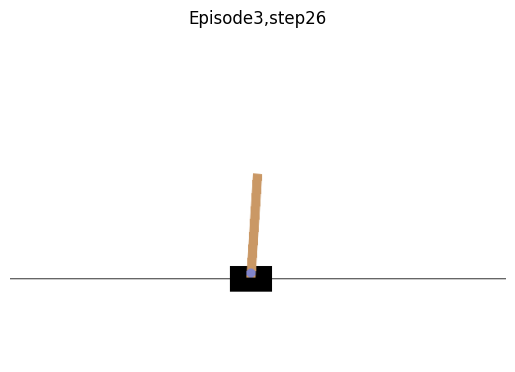

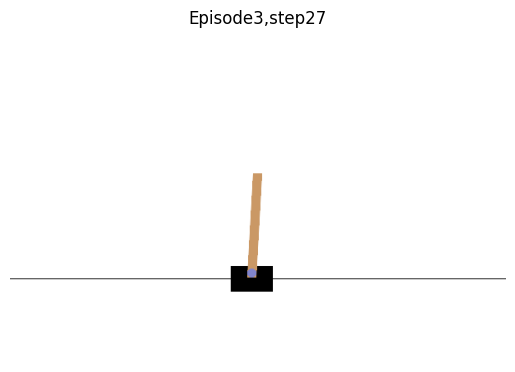

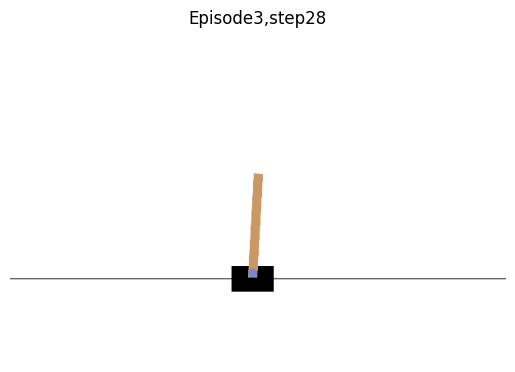

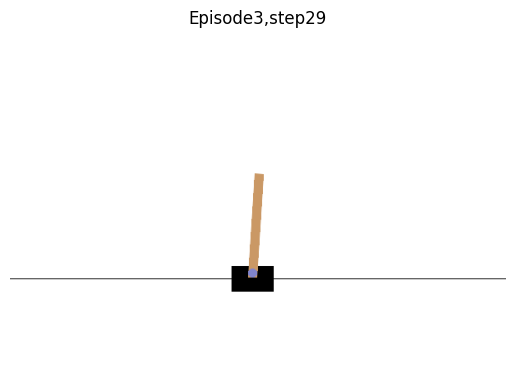

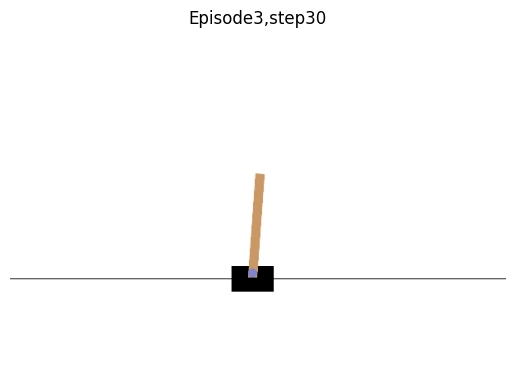

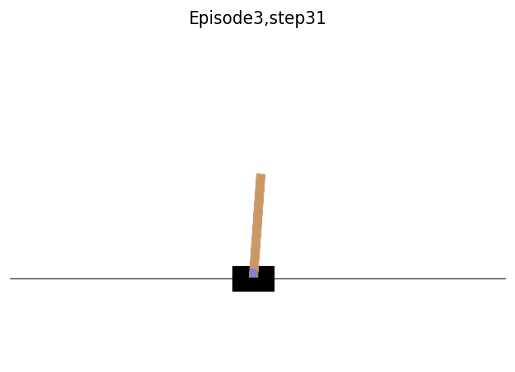

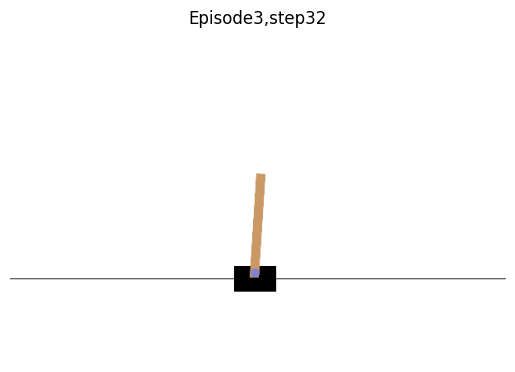

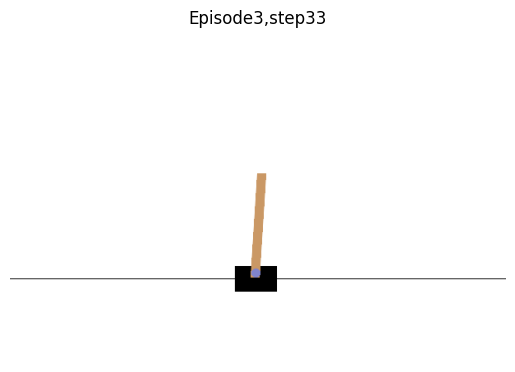

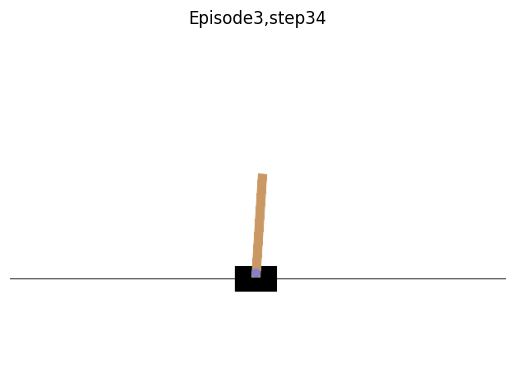

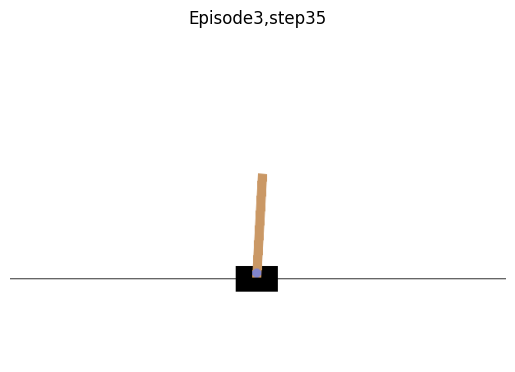

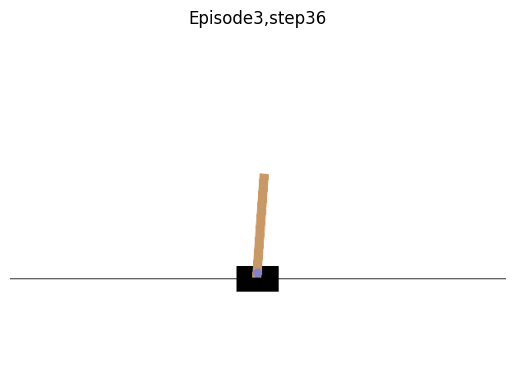

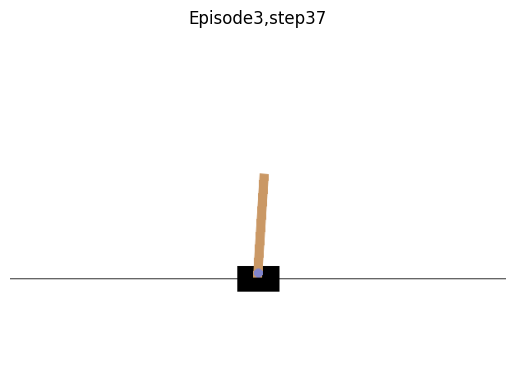

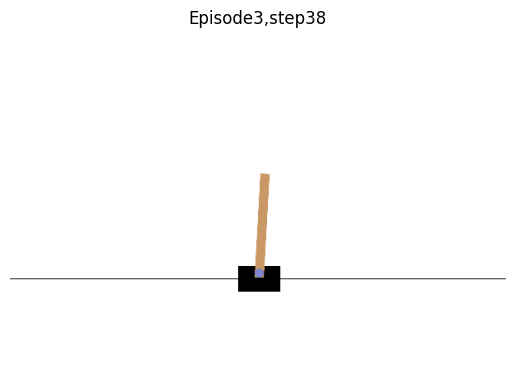

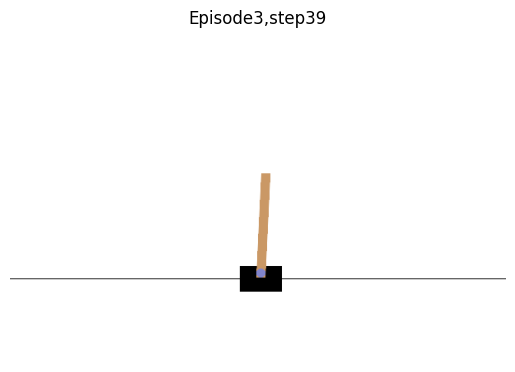

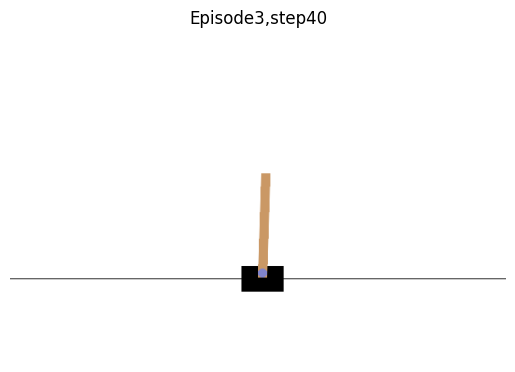

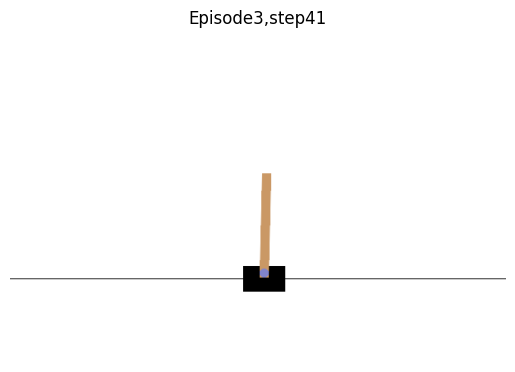

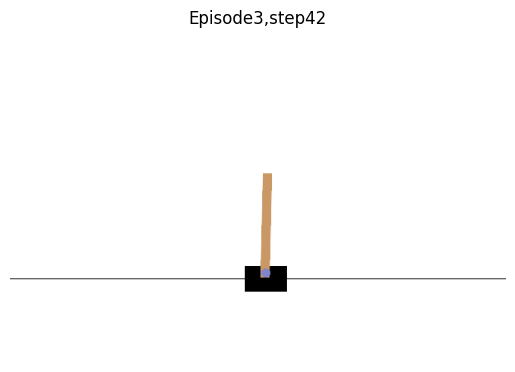

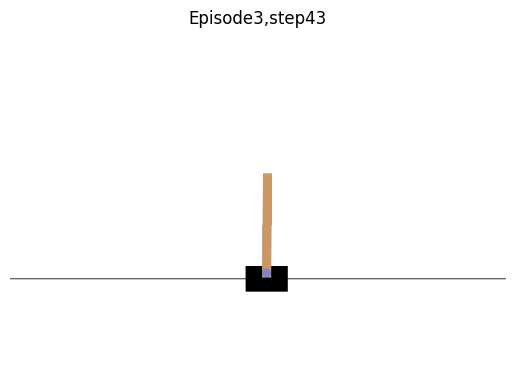

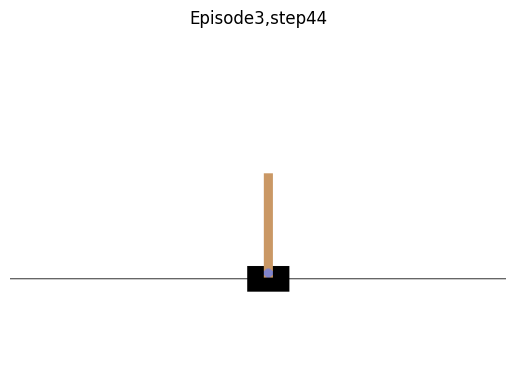

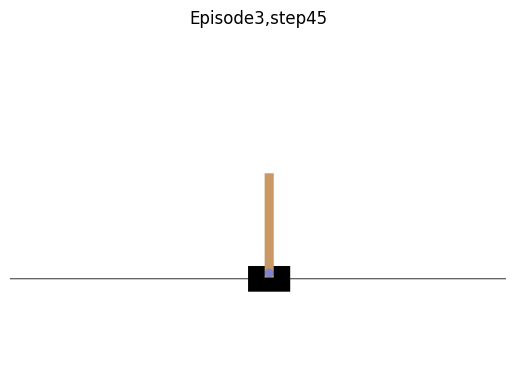

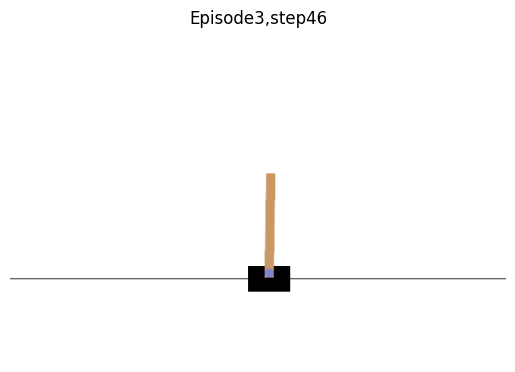

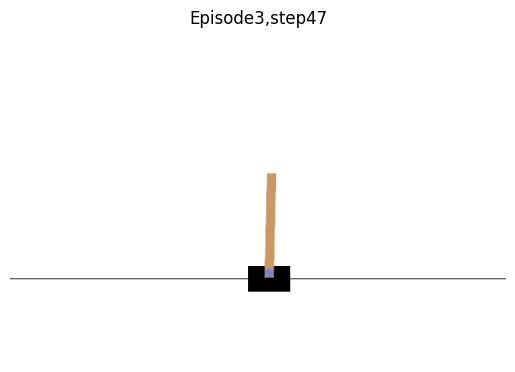

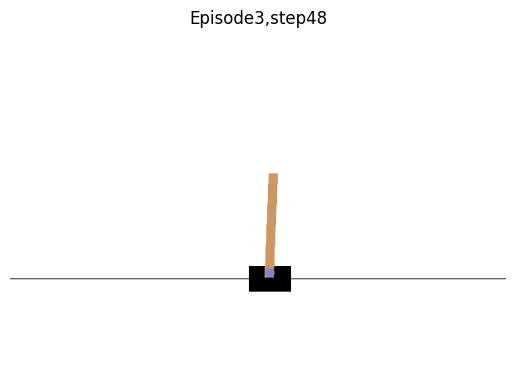

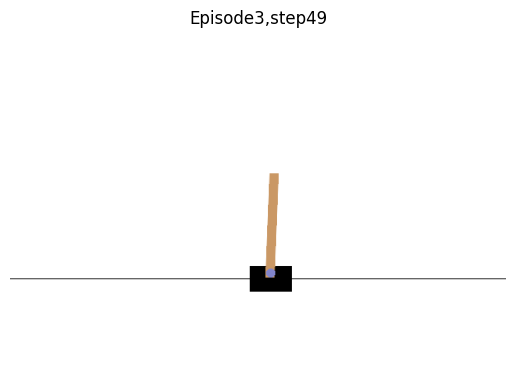

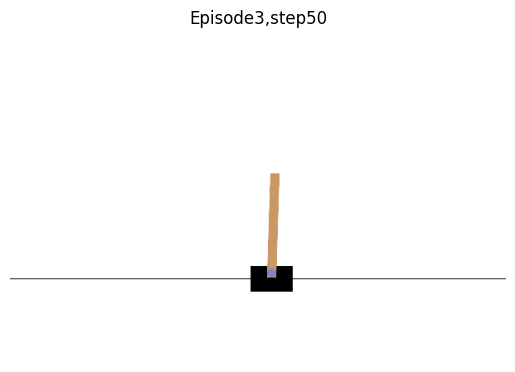

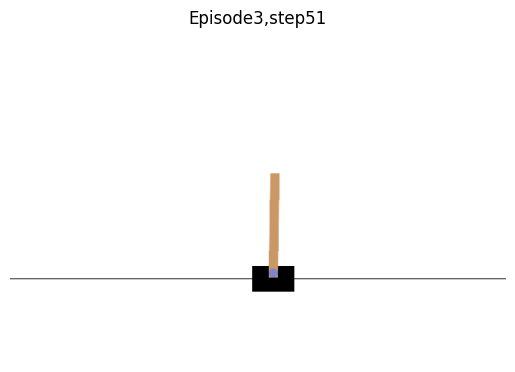

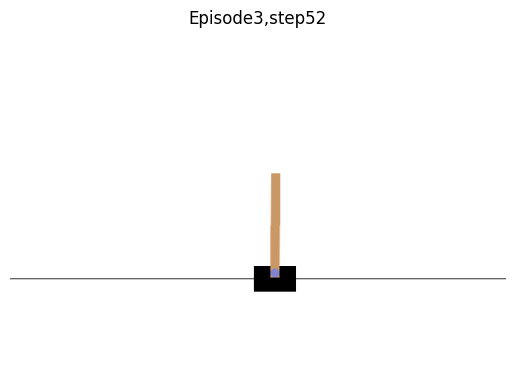

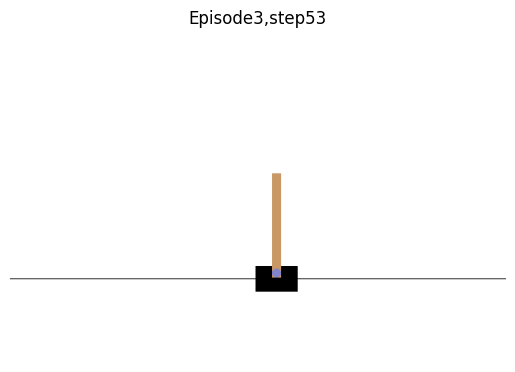

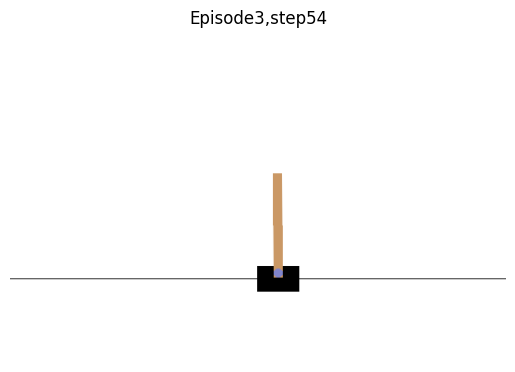

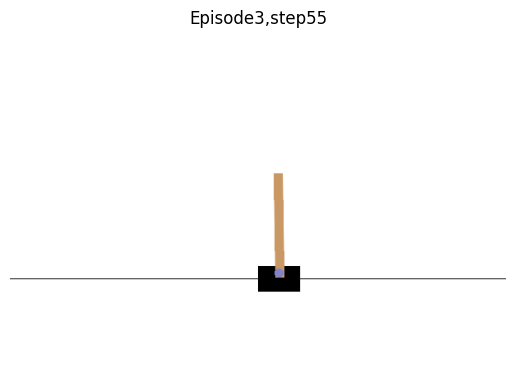

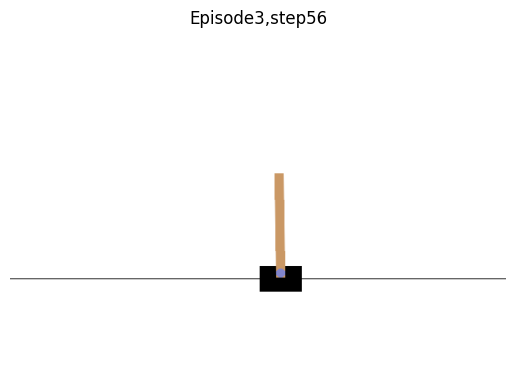

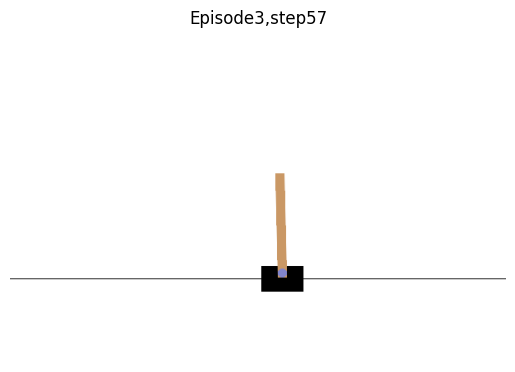

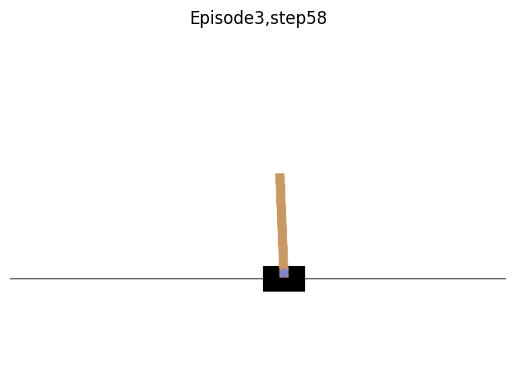

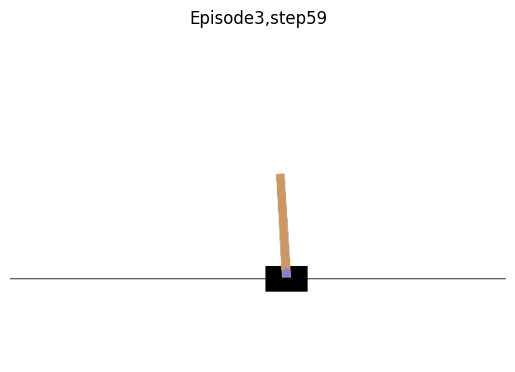

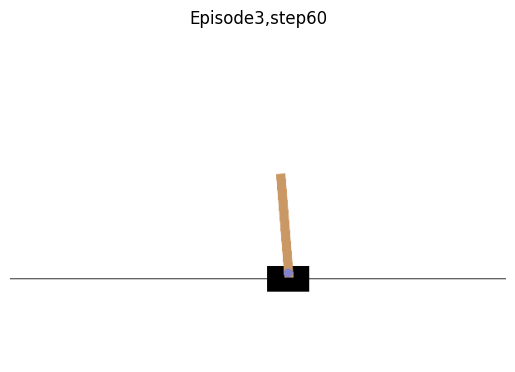

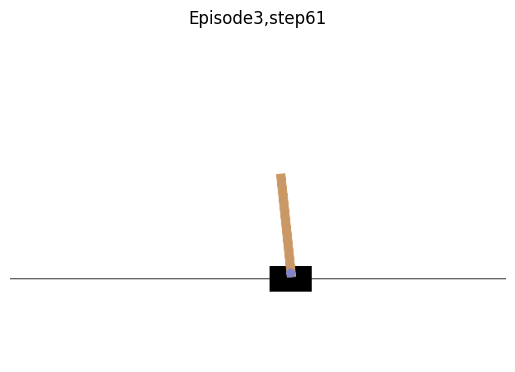

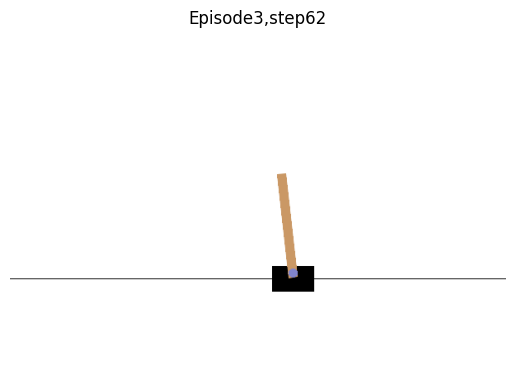

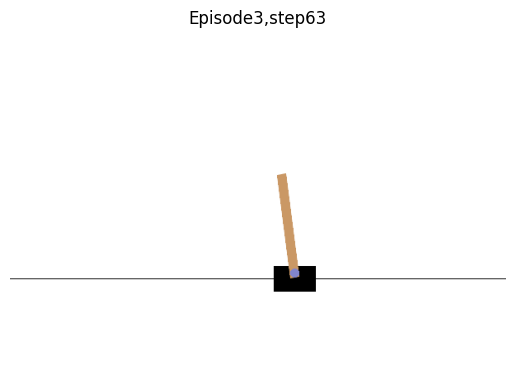

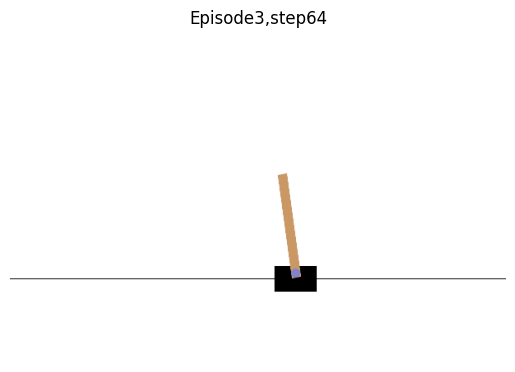

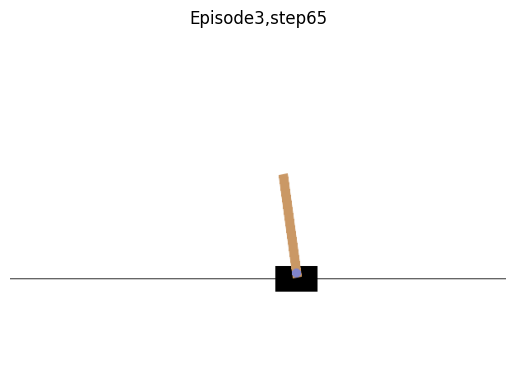

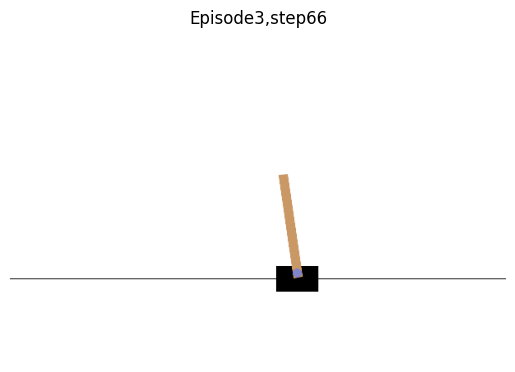

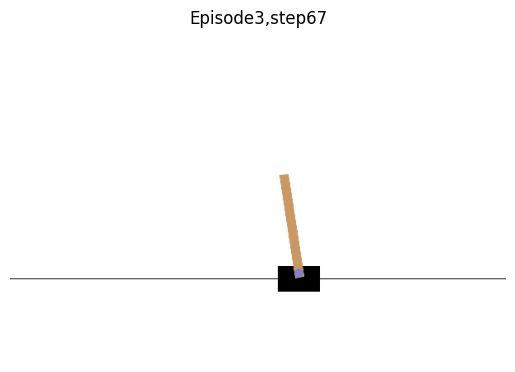

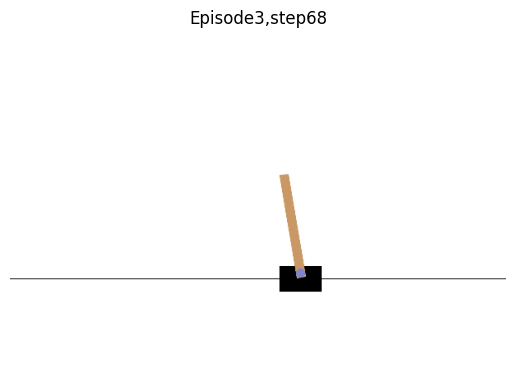

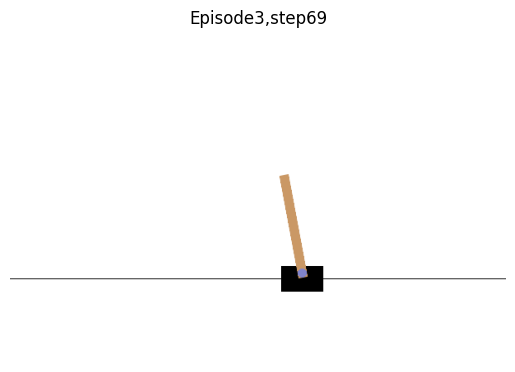

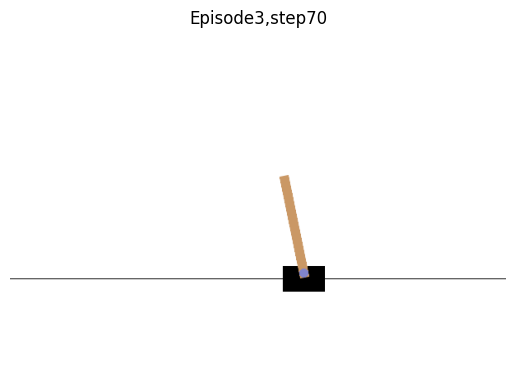

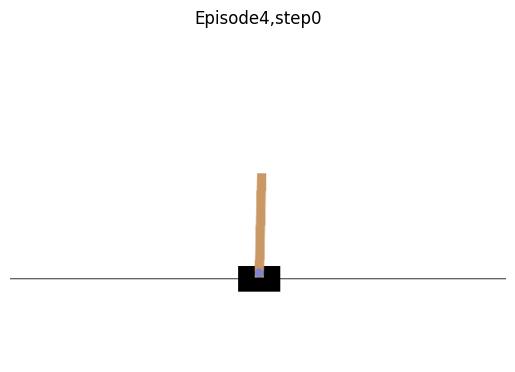

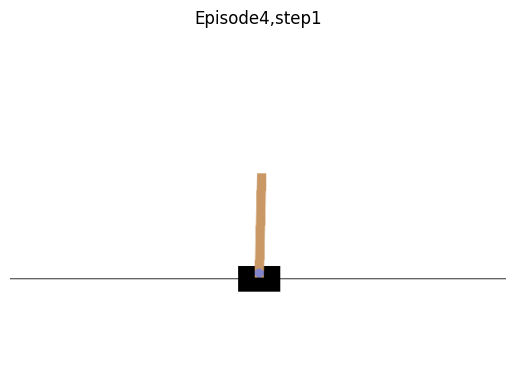

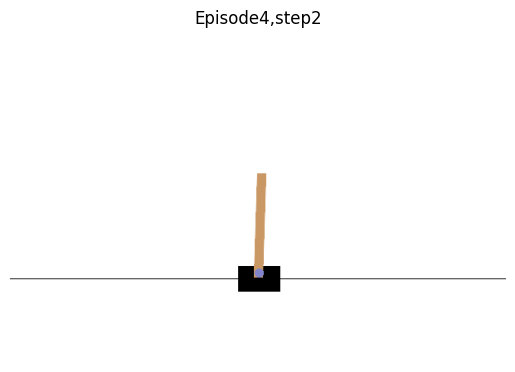

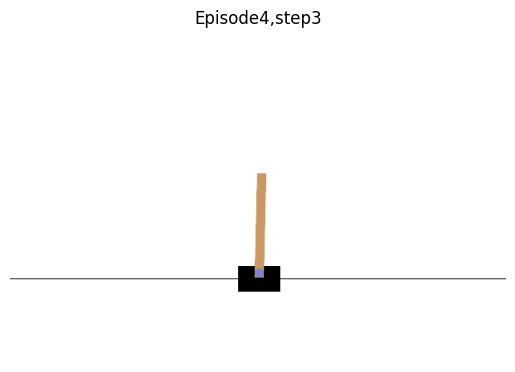

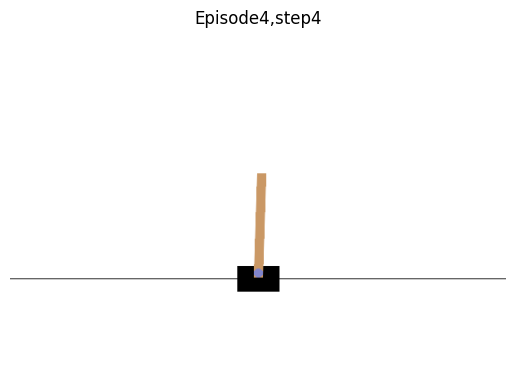

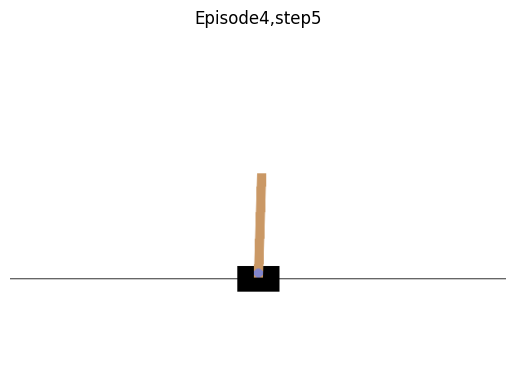

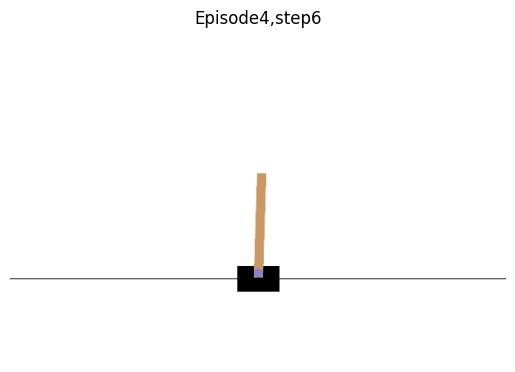

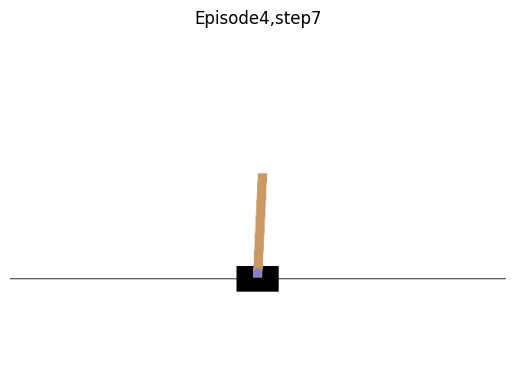

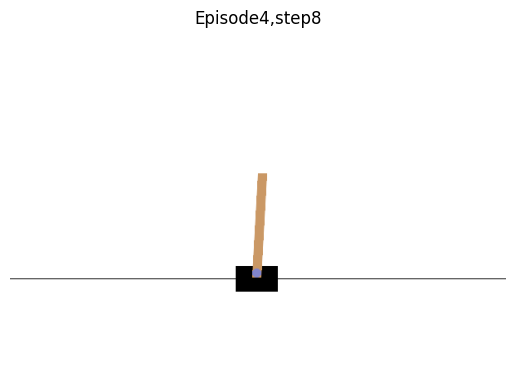

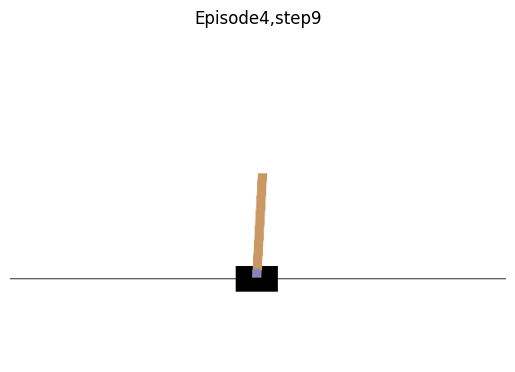

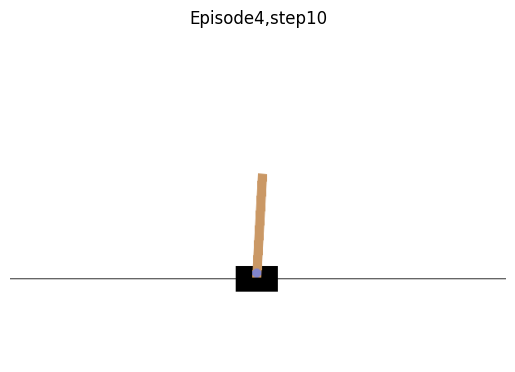

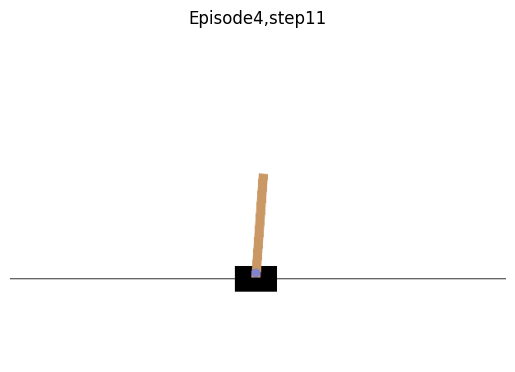

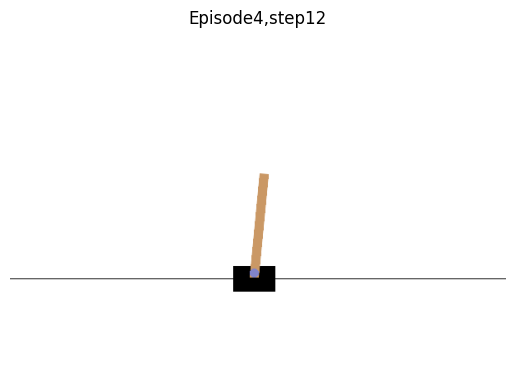

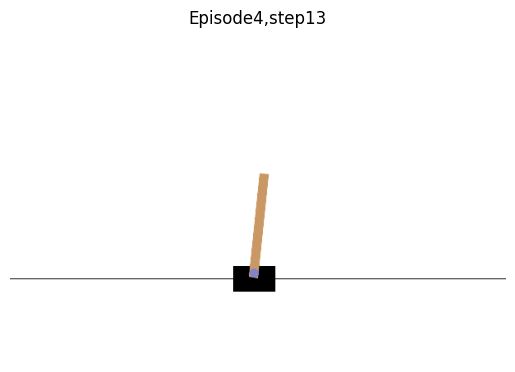

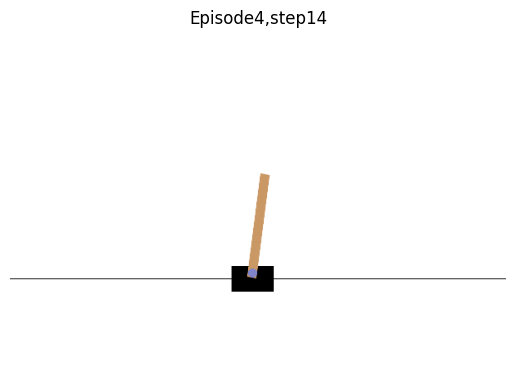

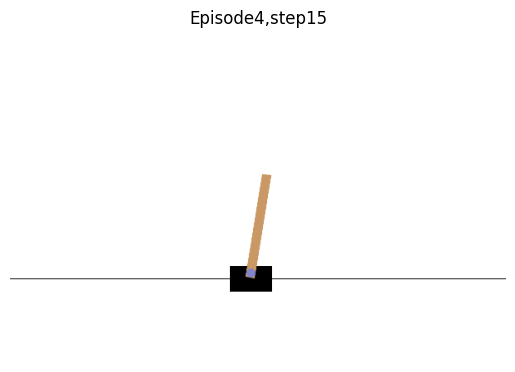

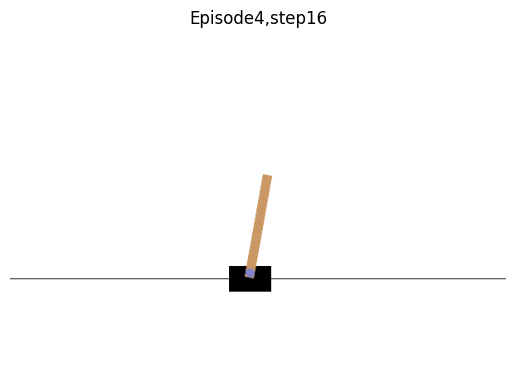

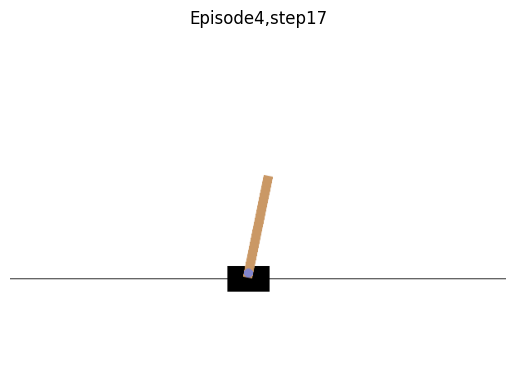

In [2]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
env=gym.make("CartPole-v1",render_mode="rgb_array")
episodenumber=5
timesteps=100
for episode in range(episodenumber):
  result=env.reset()#for initial state
  for t in range(timesteps):
    frame=env.render()
    frame=frame[0]
    frame=np.array(frame)#will take the entire of array of state
    plt.imshow(frame)
    plt.title(f"Episode{episode},step{t}")
    plt.axis("off")
    plt.show()
    step_result=env.step(env.action_space.sample())
    #handle gym old/new versions
    if len(step_result)==5:
      obs,reward,terminated,truncated,info=step_result
    else:
      obs,reward,done,info=step_result
      terminated,truncated=done,False
      #slow animation
    time.sleep(0.1)
    if terminated or truncated:
      break
  env.close()

In [3]:
import gymnasium as gym
import imageio

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [4]:
env=gym.make("CartPole-v1",render_mode="rgb_array")

In [5]:
#output video
video_path="/content/cartpole.mp4"
writer=imageio.get_writer(video_path,fps=30)
#reset env
state,info=env.reset()

for step in range(500):#Record 500 frames
  frame=env.render()#get rgb frame
  writer.append_data(frame)

  #step the env
  state,reward,terminated,truncated,info=env.step(env.action_space.sample())

  #if episode ends ,reset
  if terminated or truncated:
    state,info=env.reset()
writer.close()
env.close()

In [6]:
from google.colab import files
files.download("/content/cartpole.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.12/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.12/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


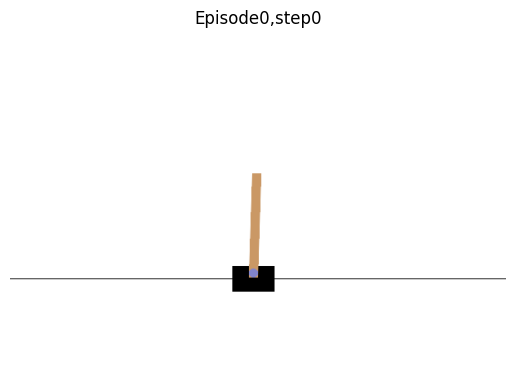

/usr/local/lib/python3.12/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


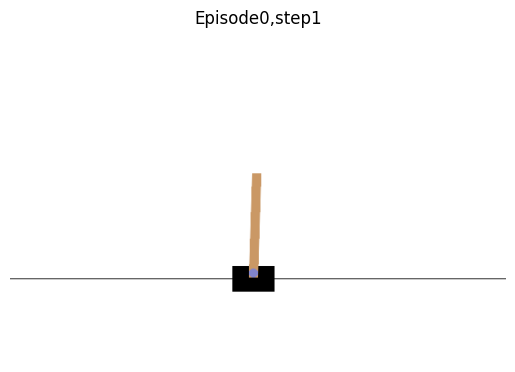

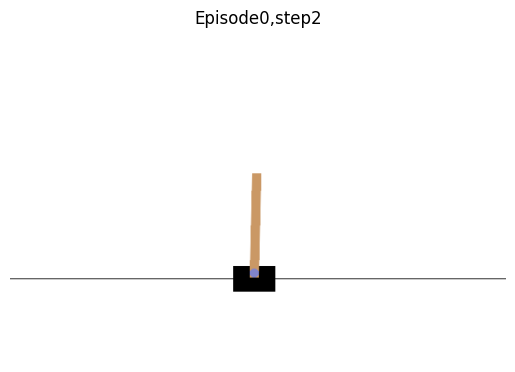

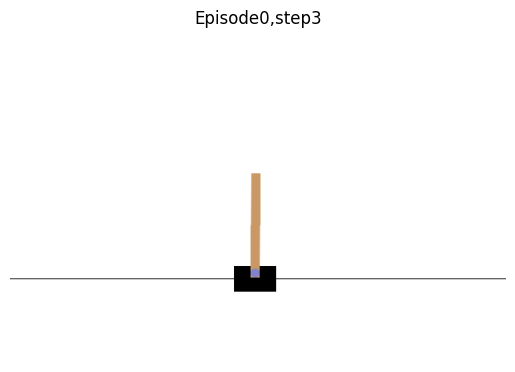

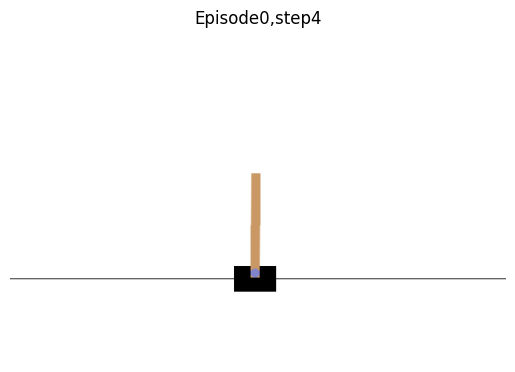

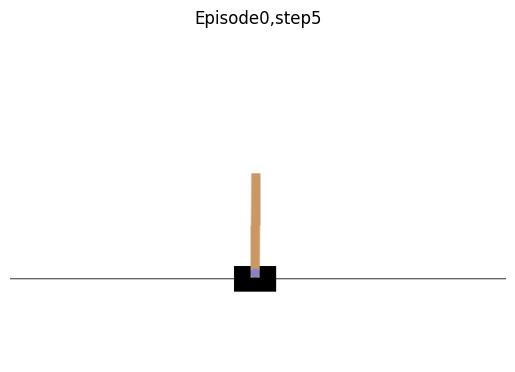

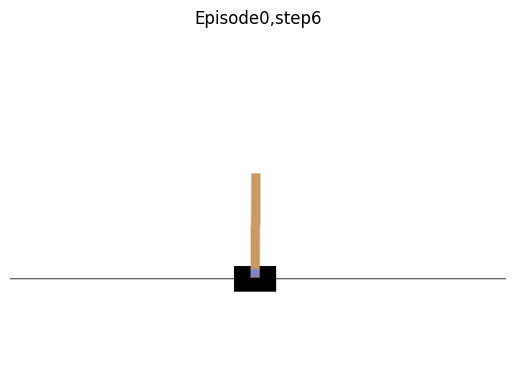

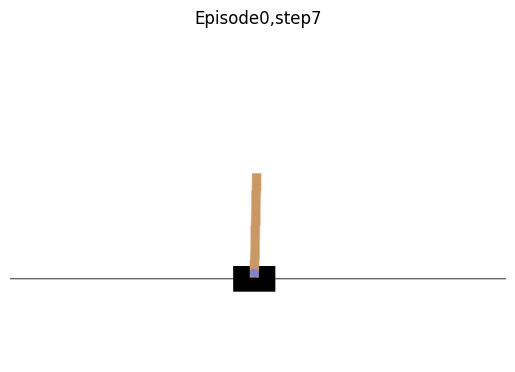

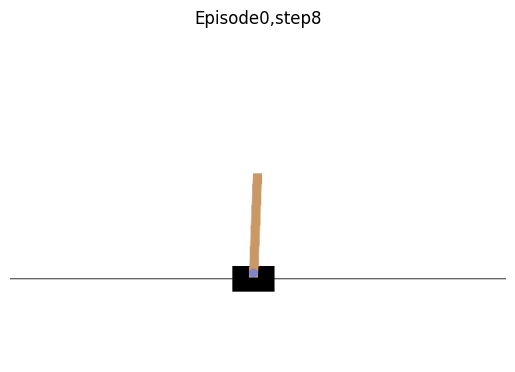

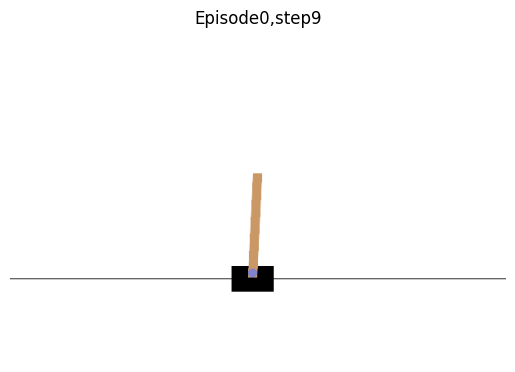

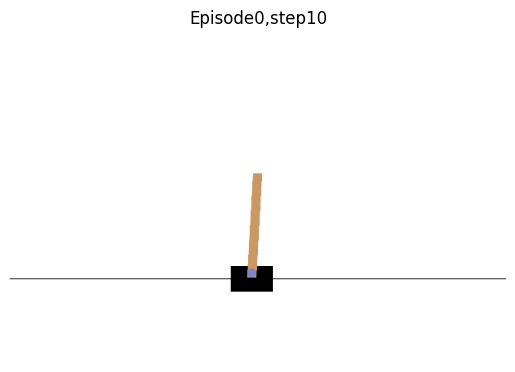

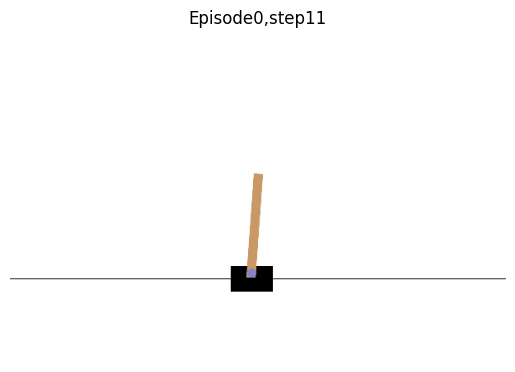

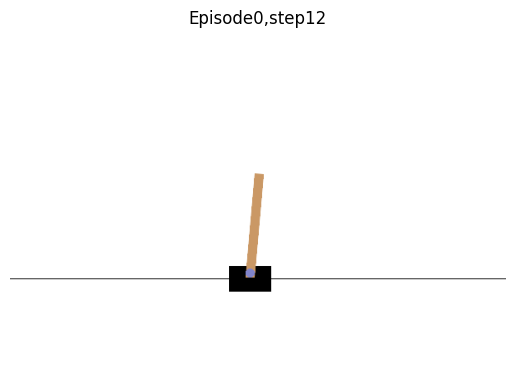

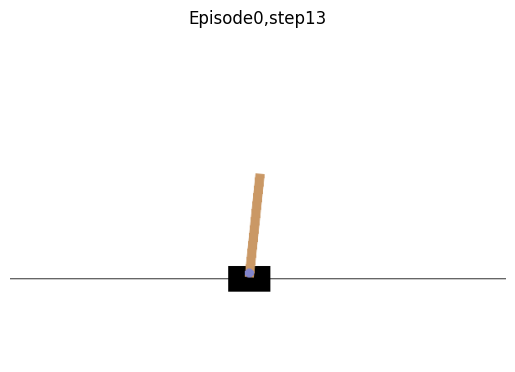

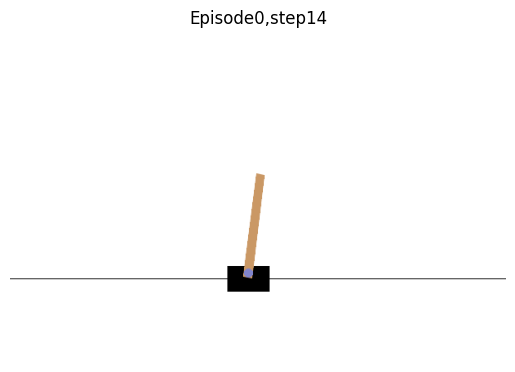

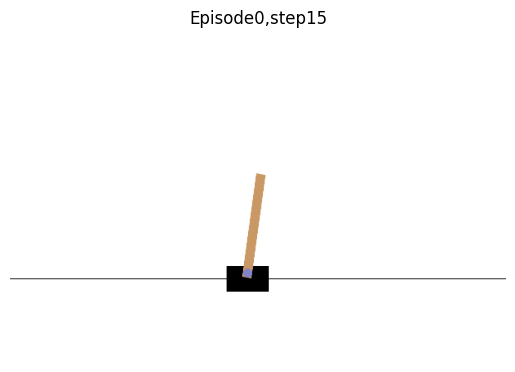

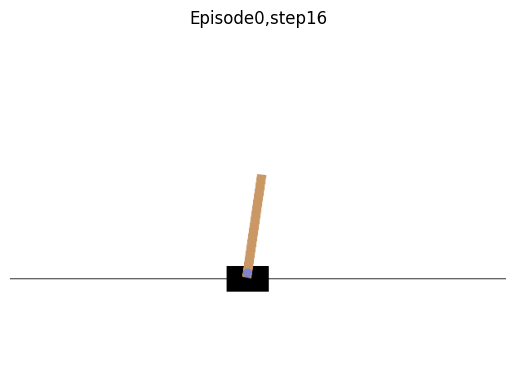

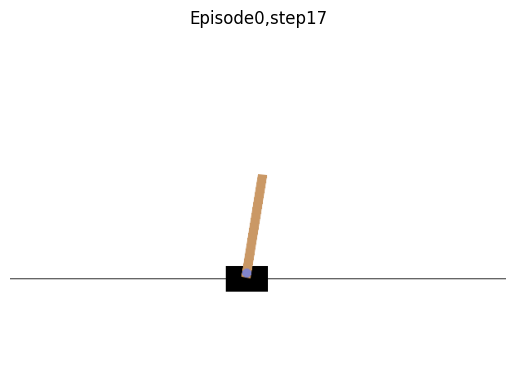

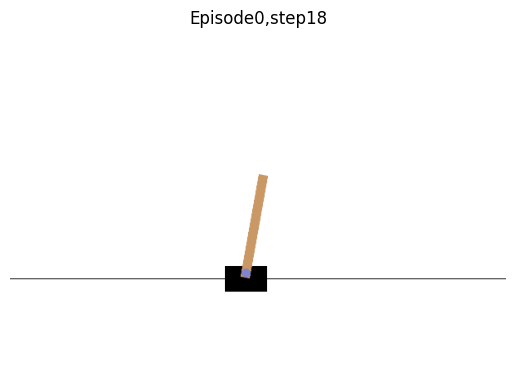

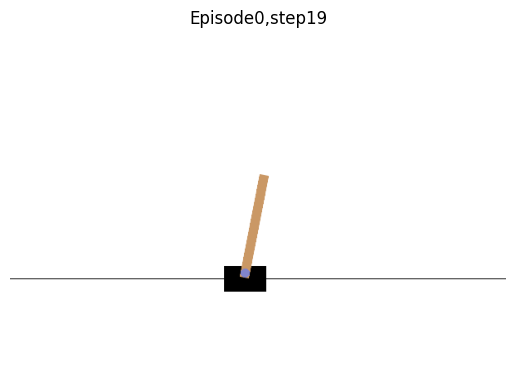

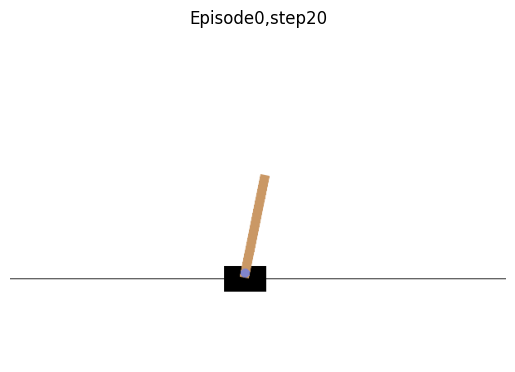

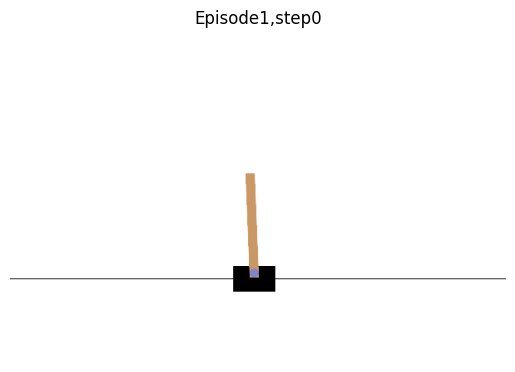

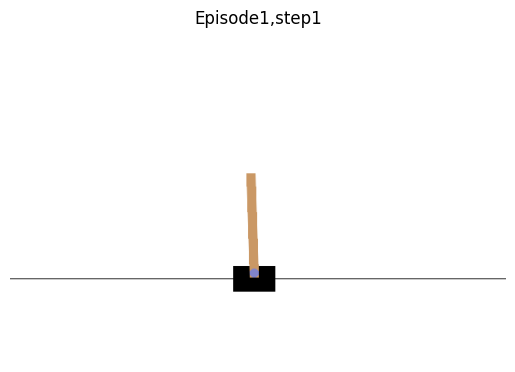

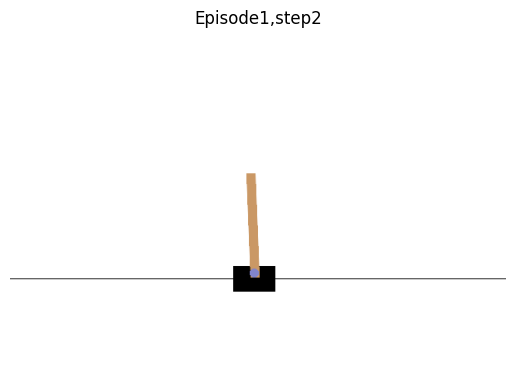

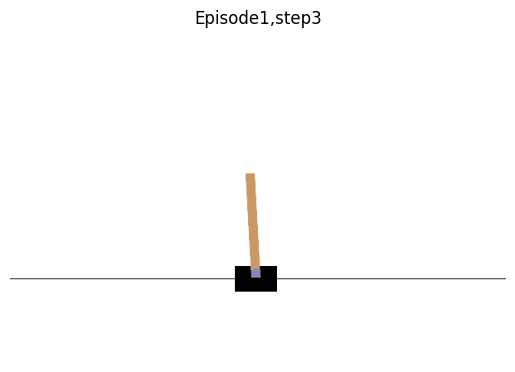

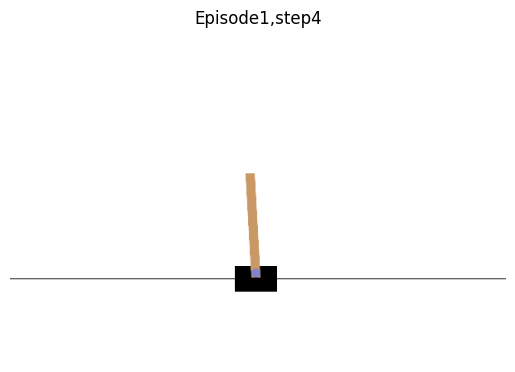

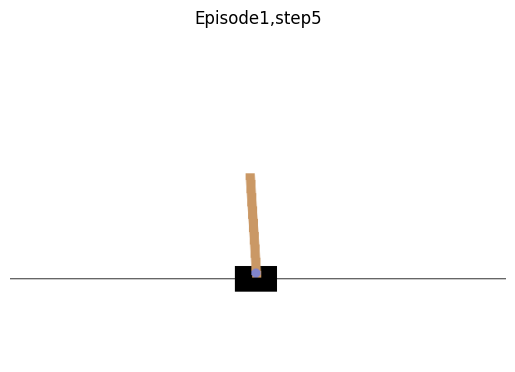

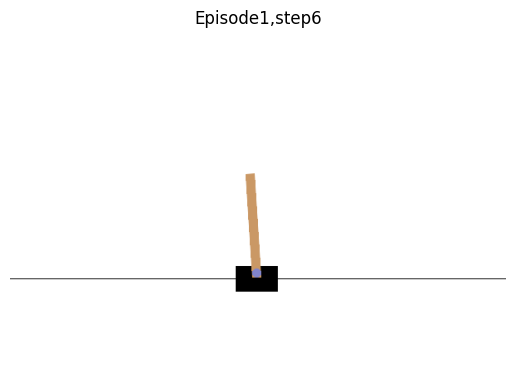

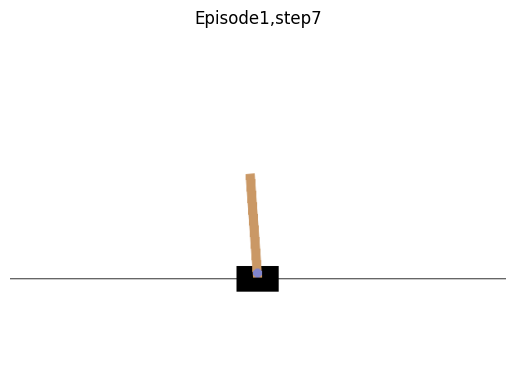

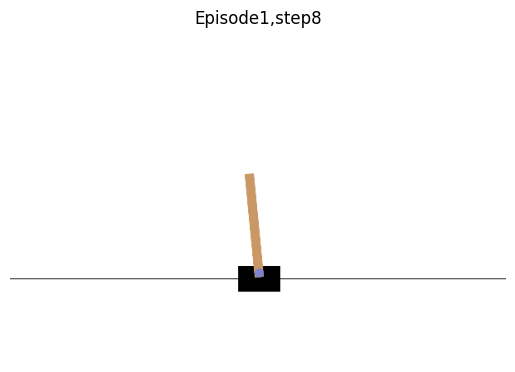

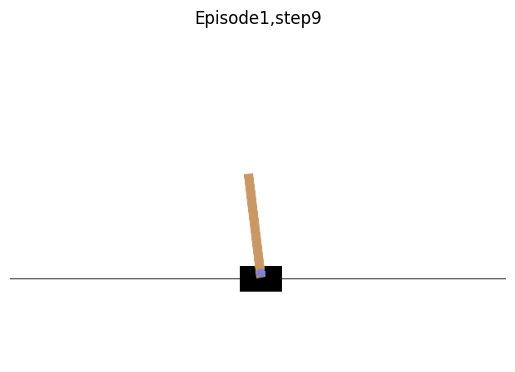

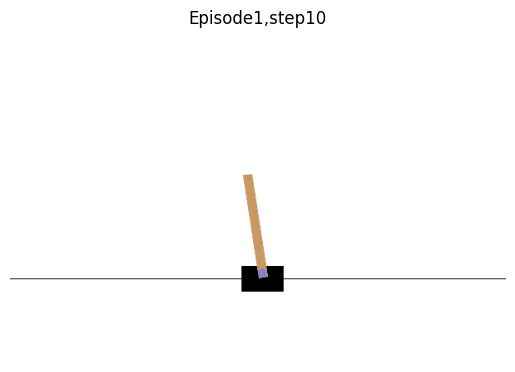

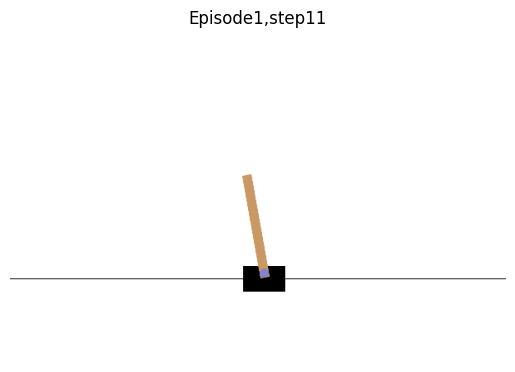

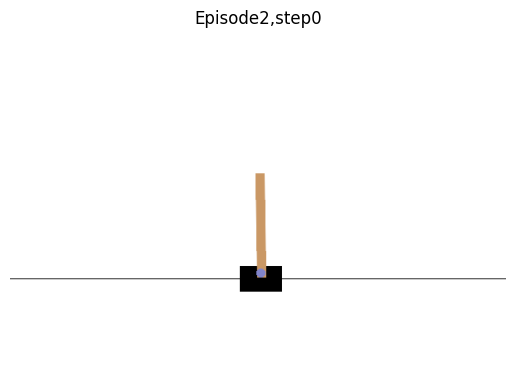

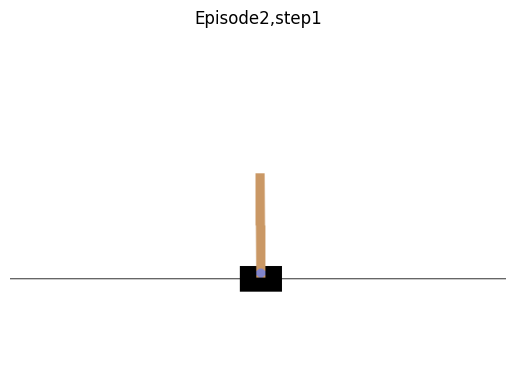

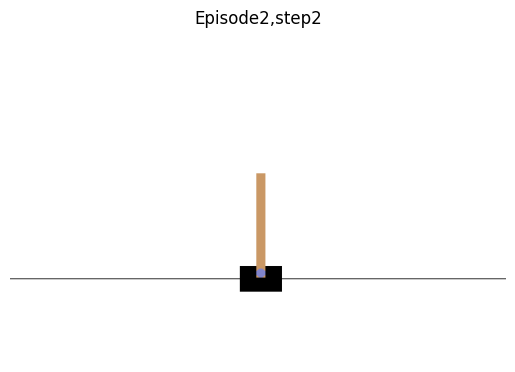

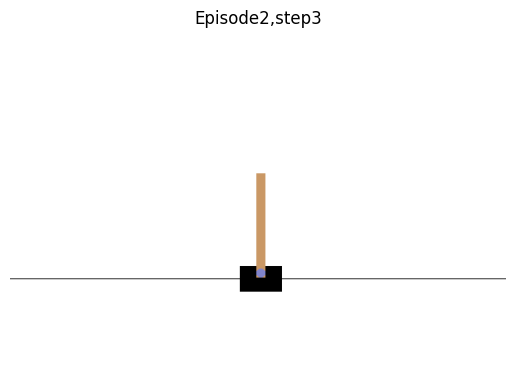

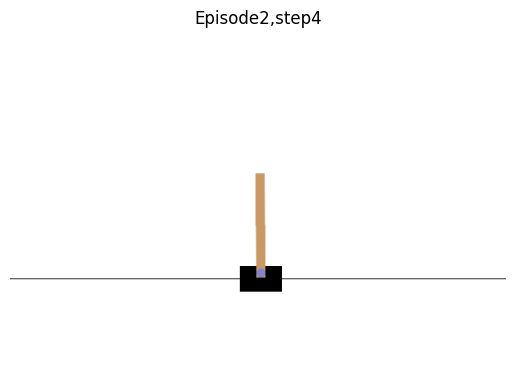

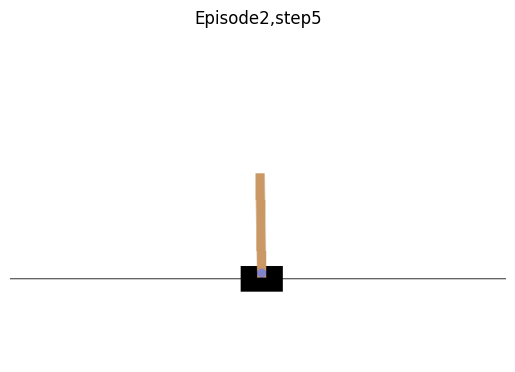

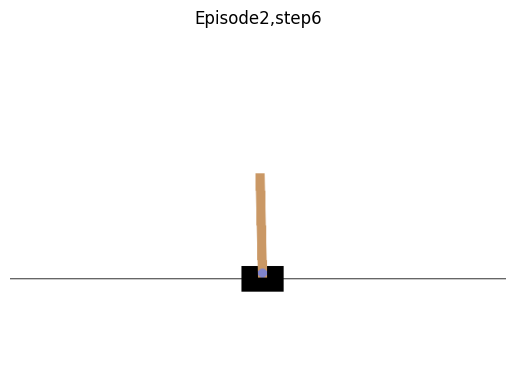

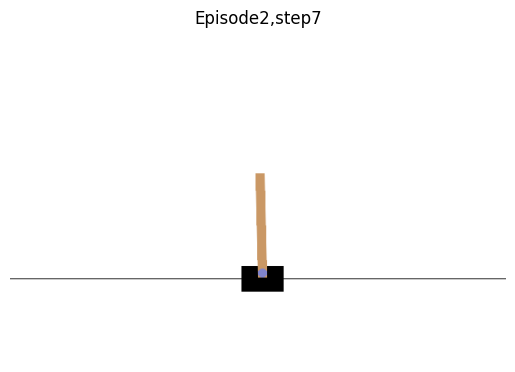

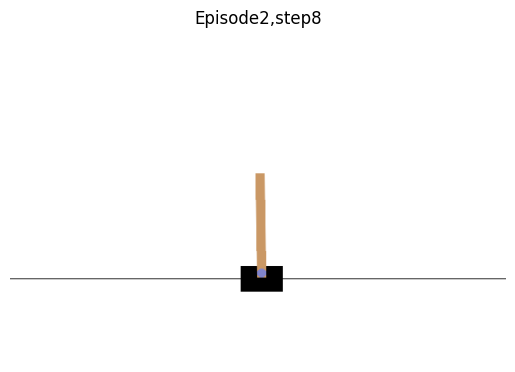

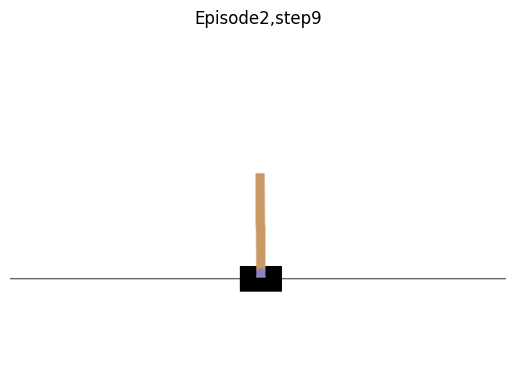

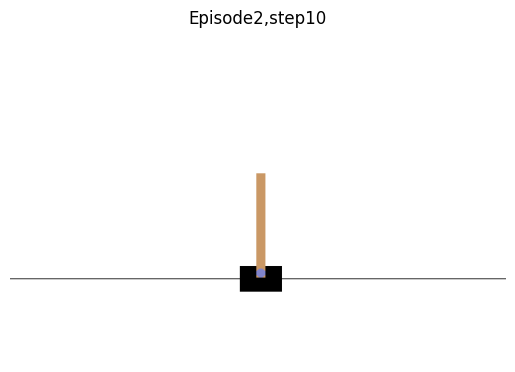

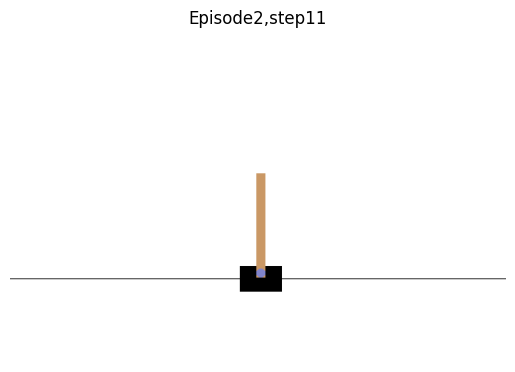

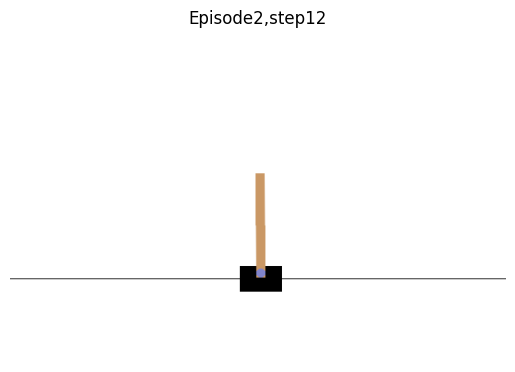

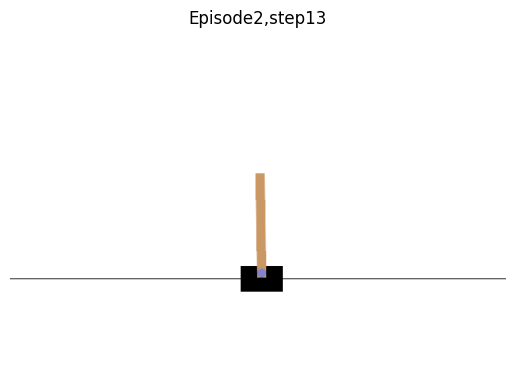

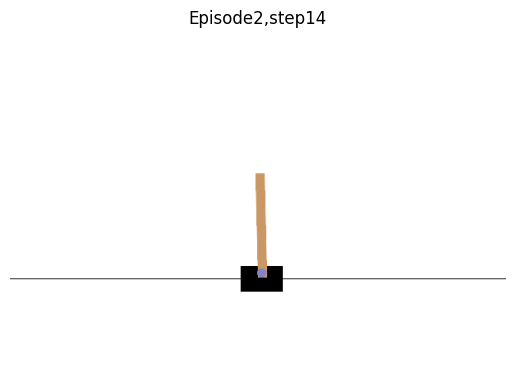

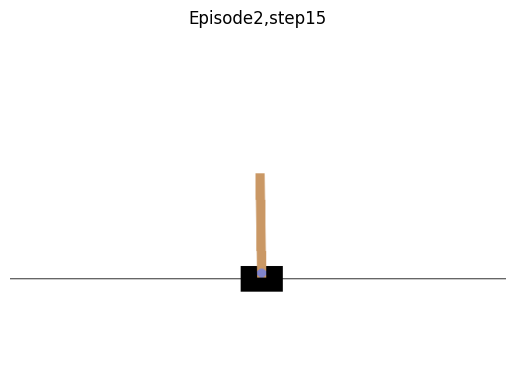

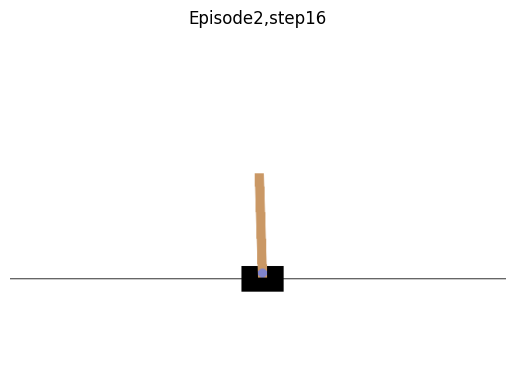

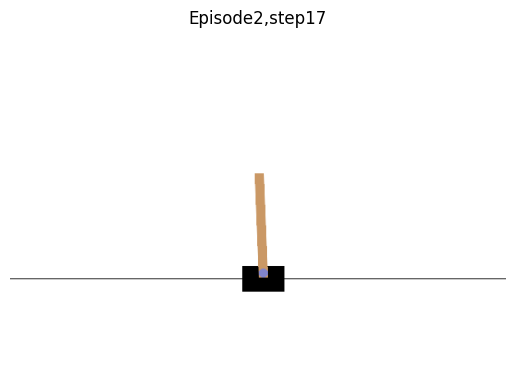

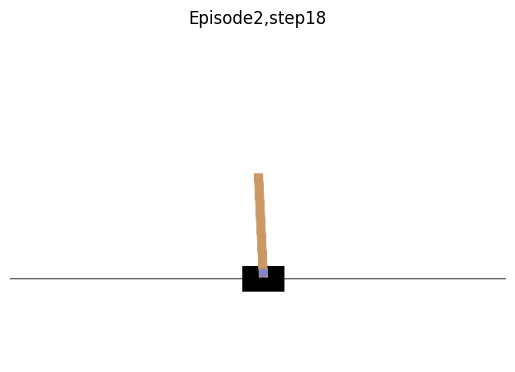

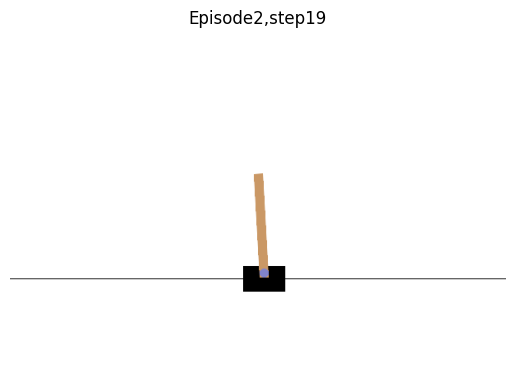

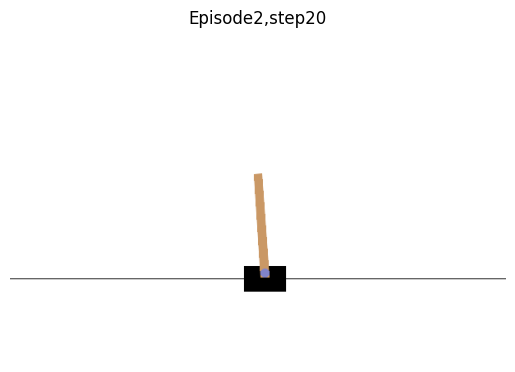

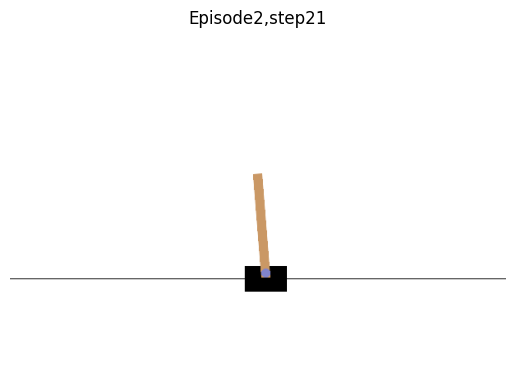

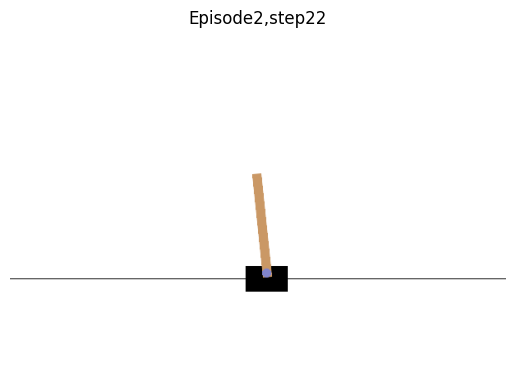

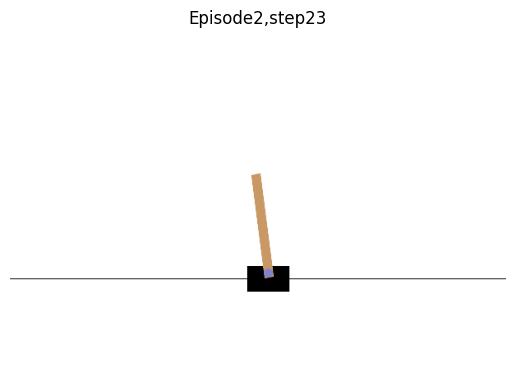

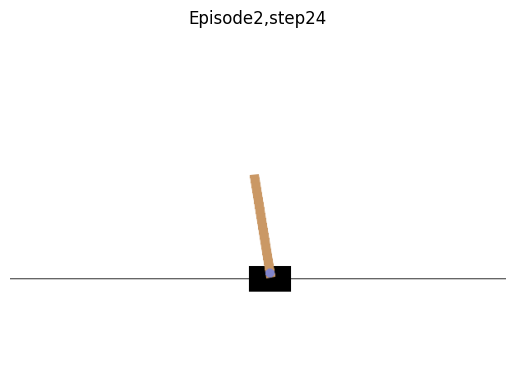

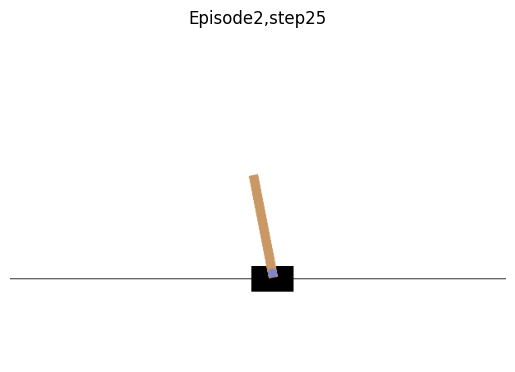

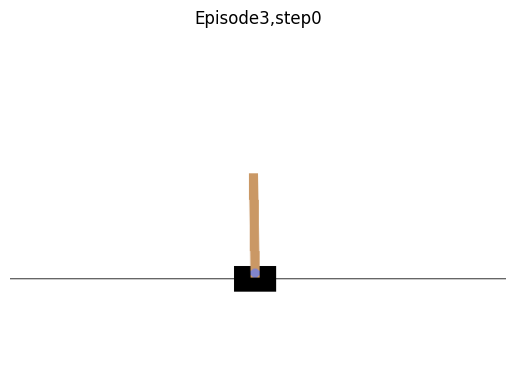

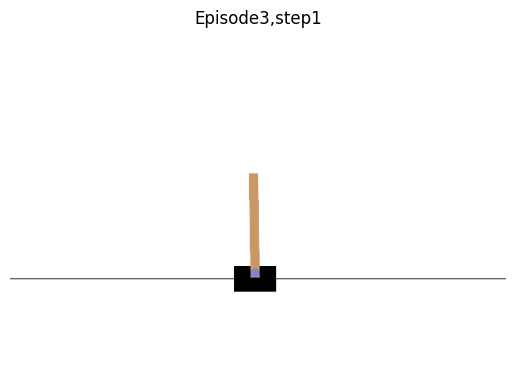

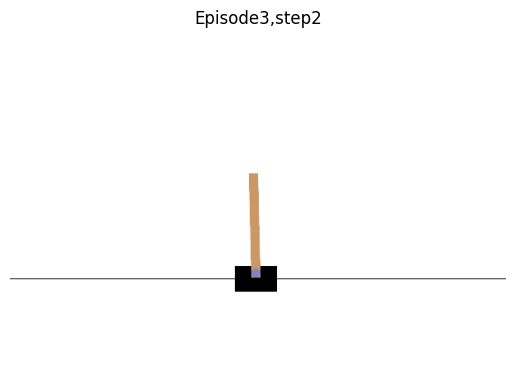

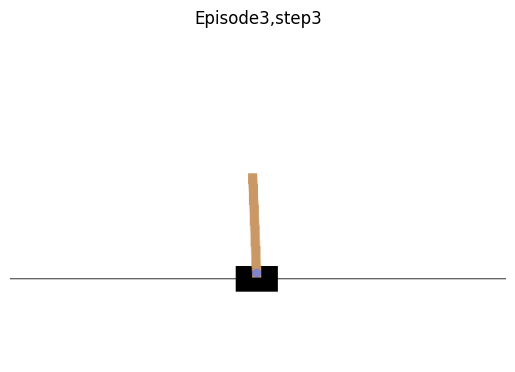

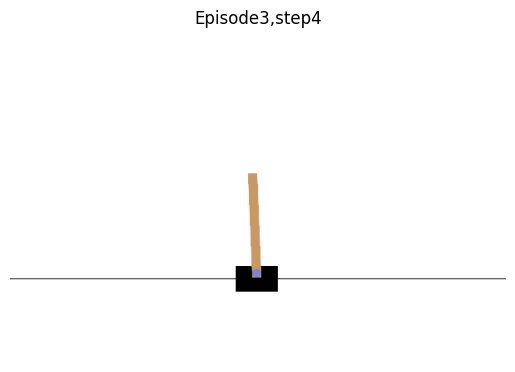

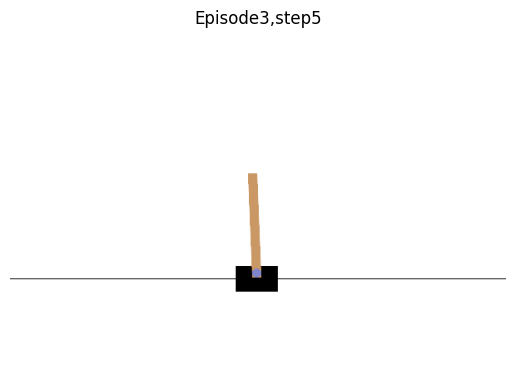

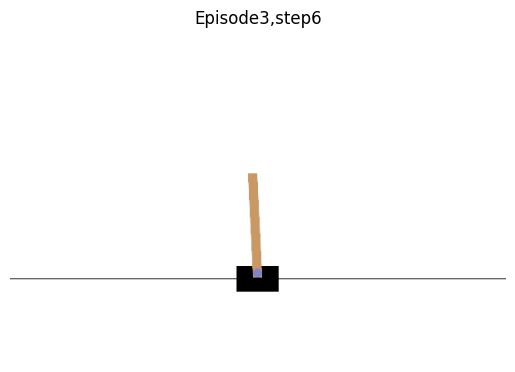

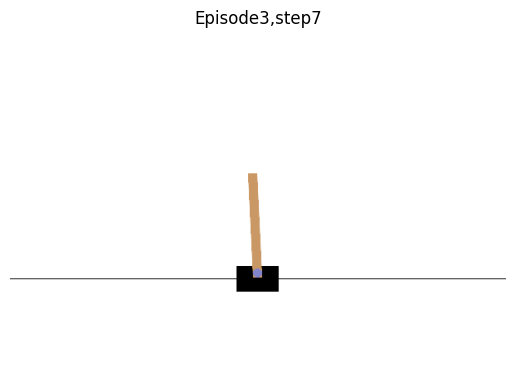

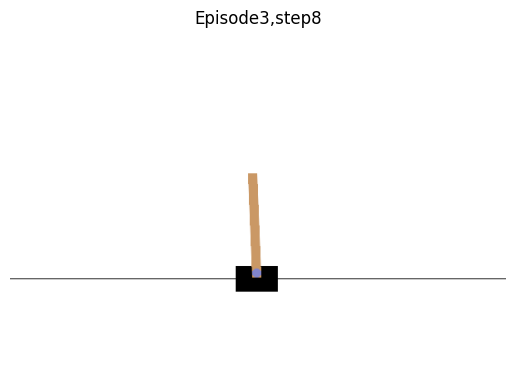

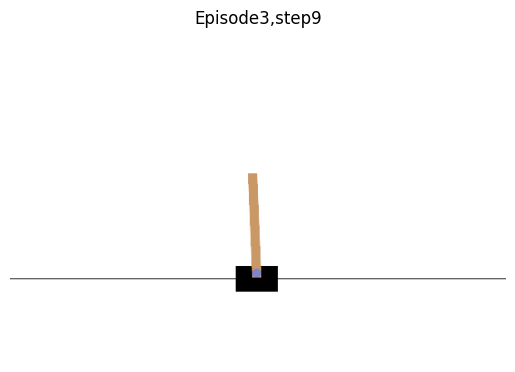

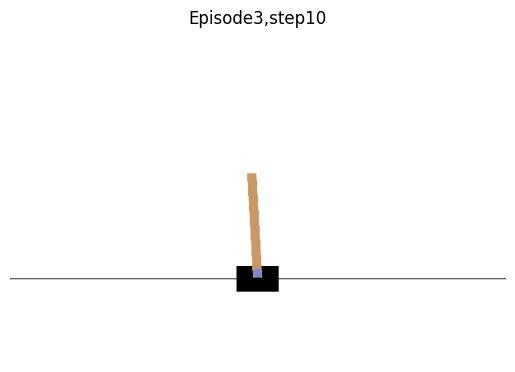

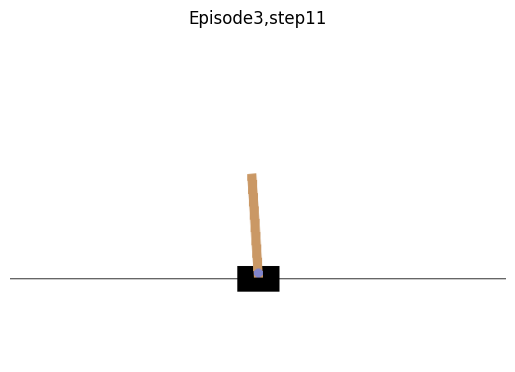

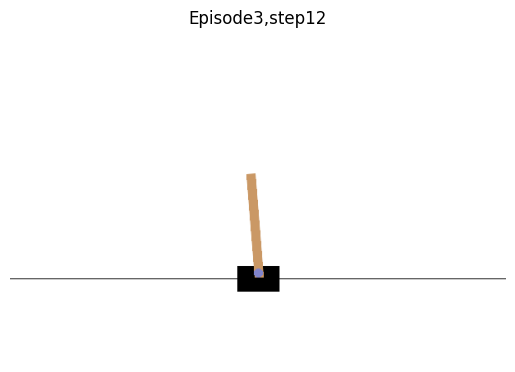

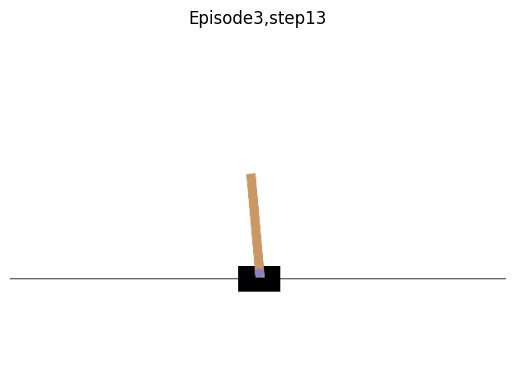

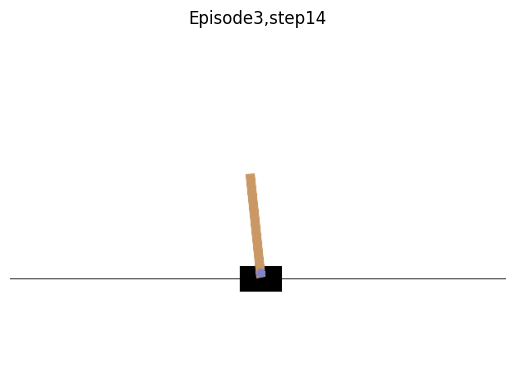

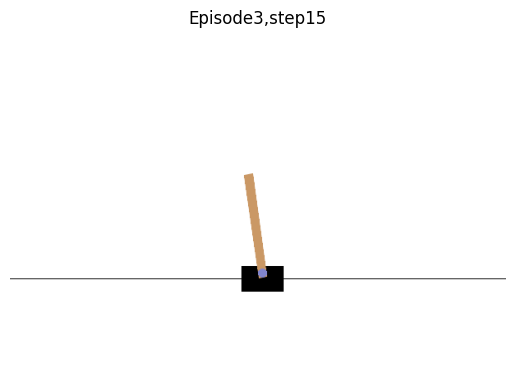

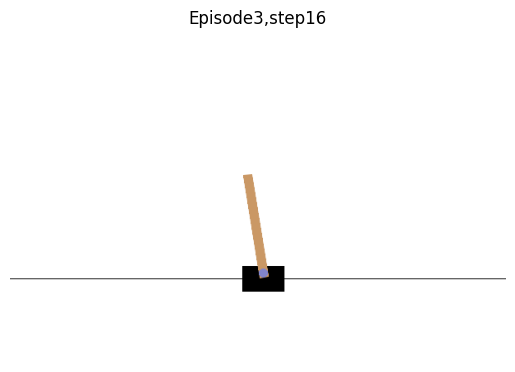

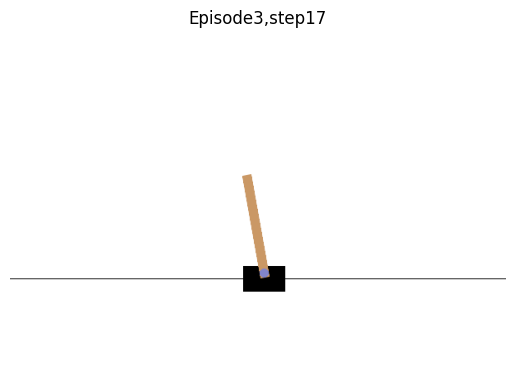

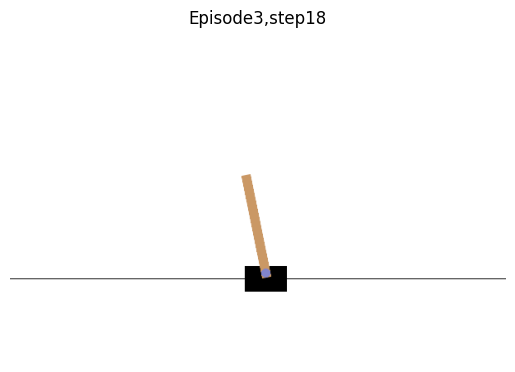

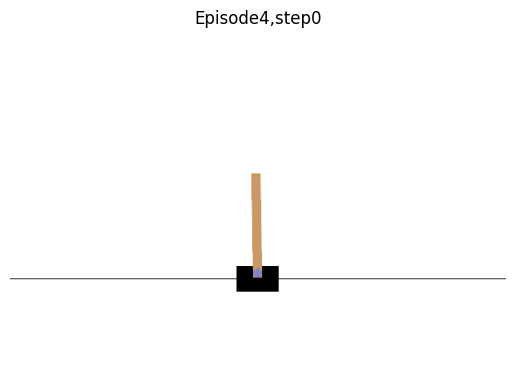

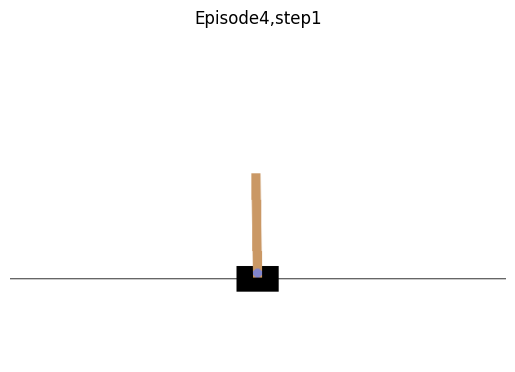

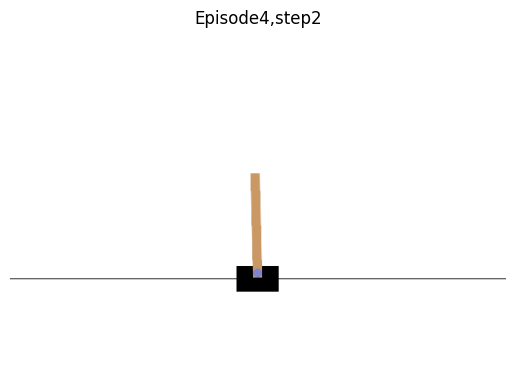

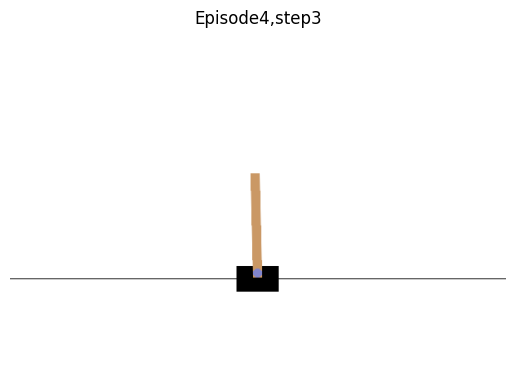

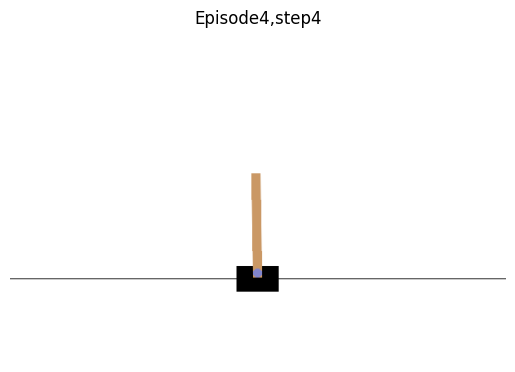

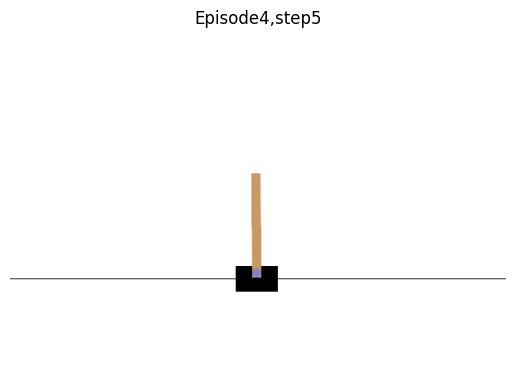

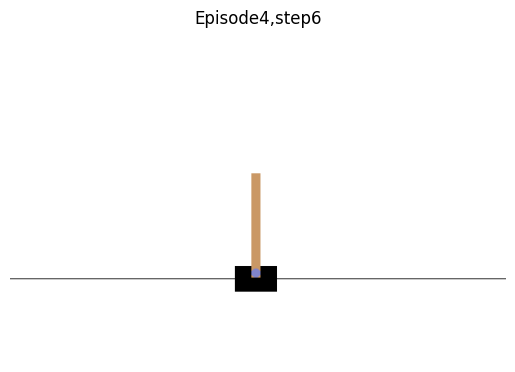

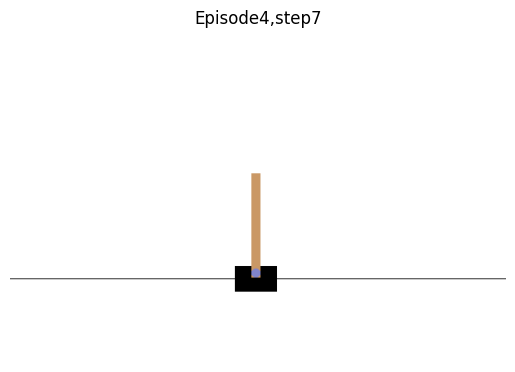

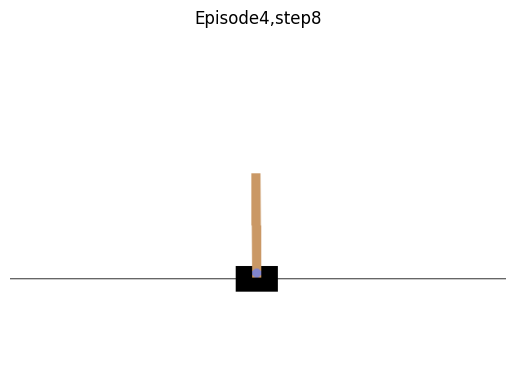

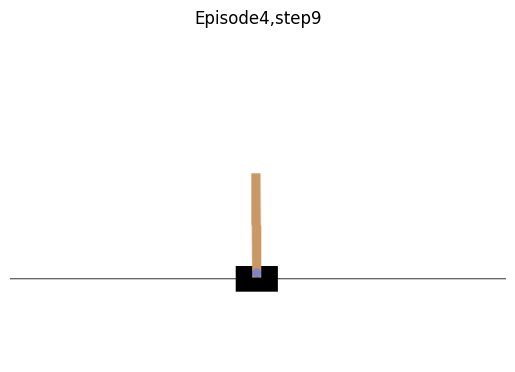

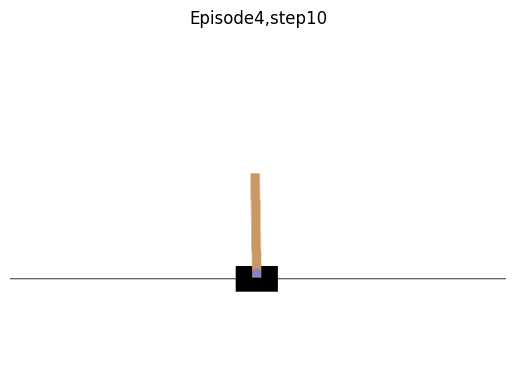

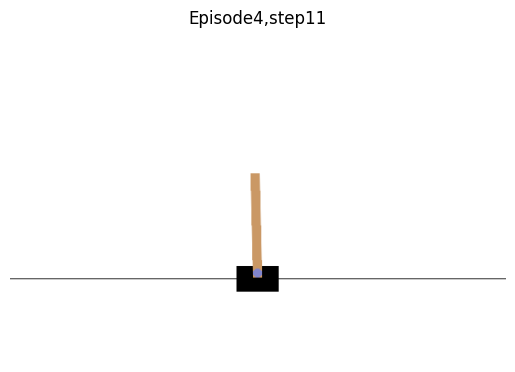

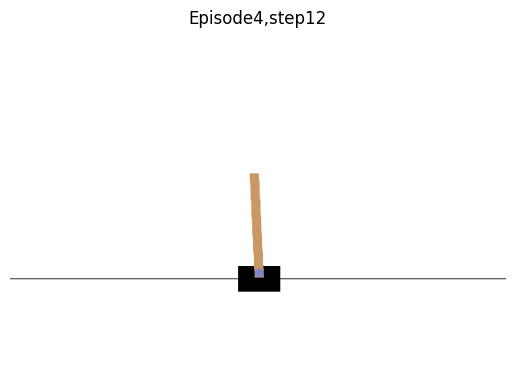

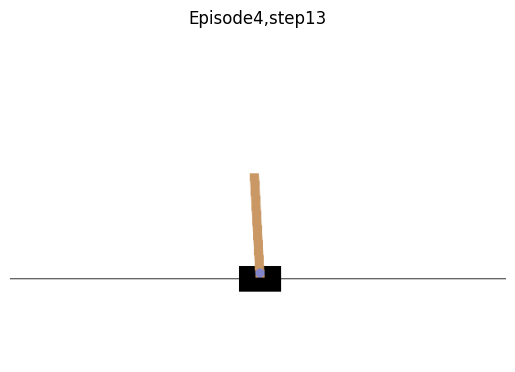

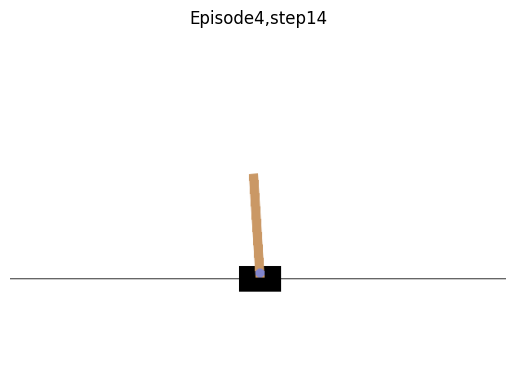

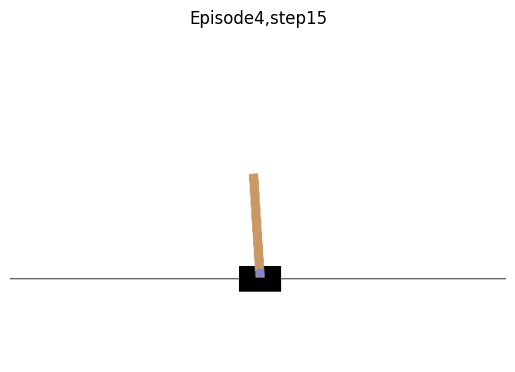

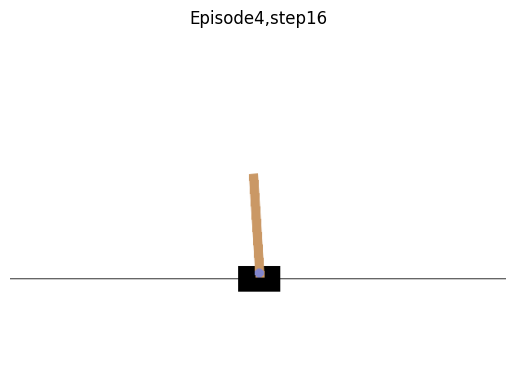

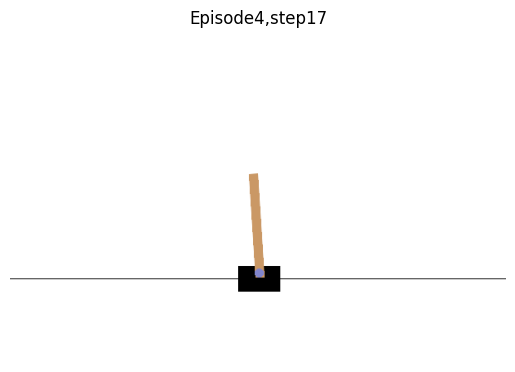

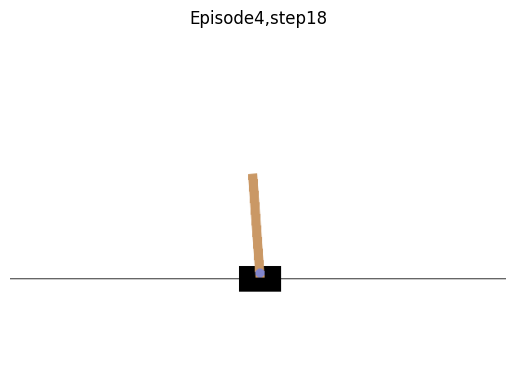

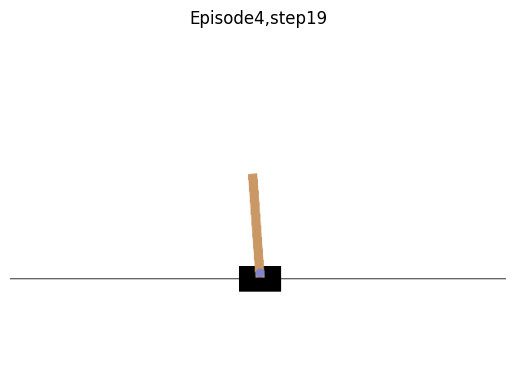

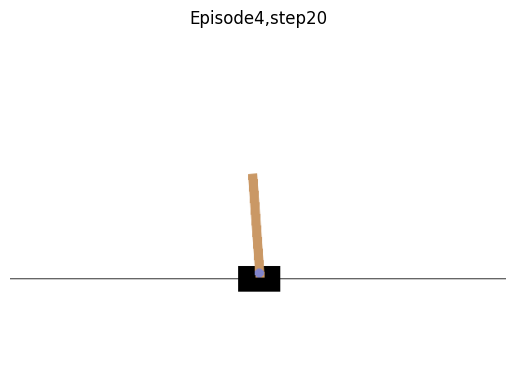

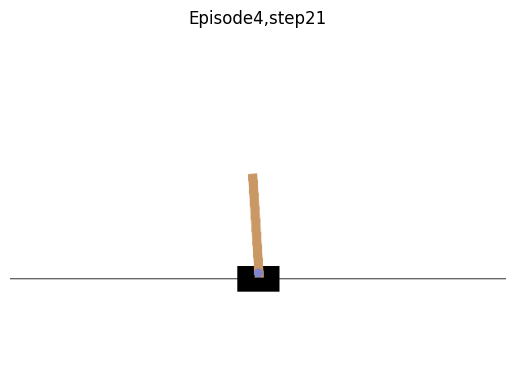

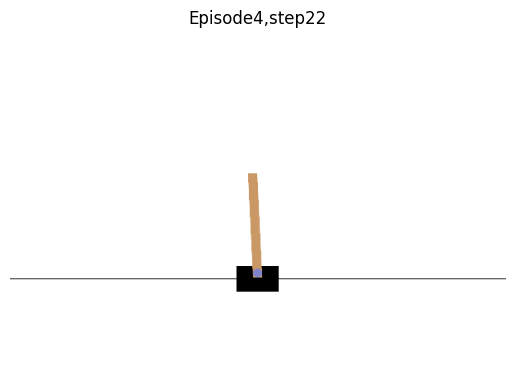

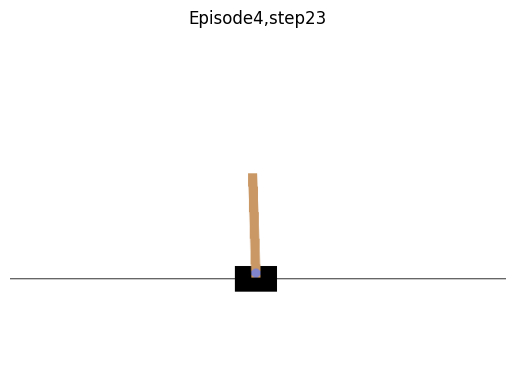

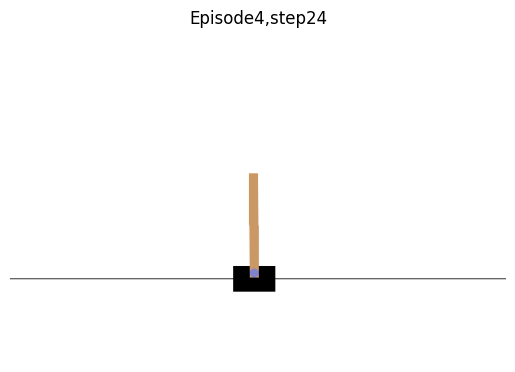

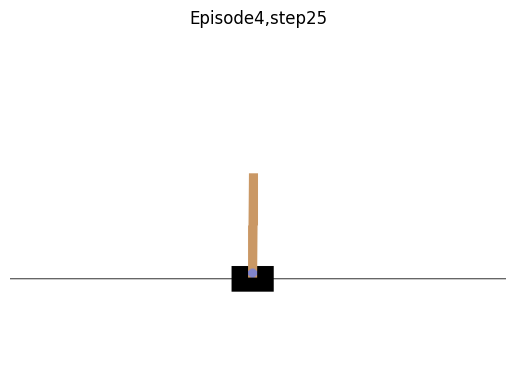

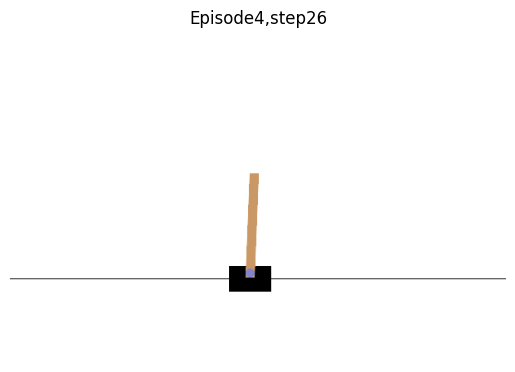

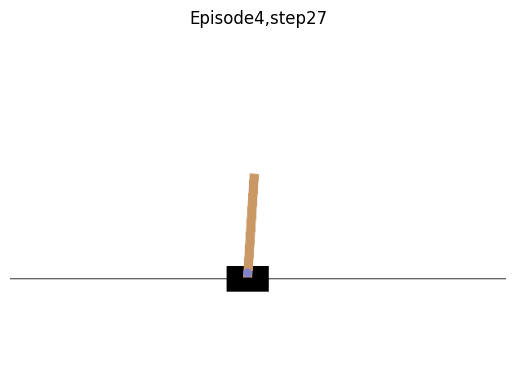

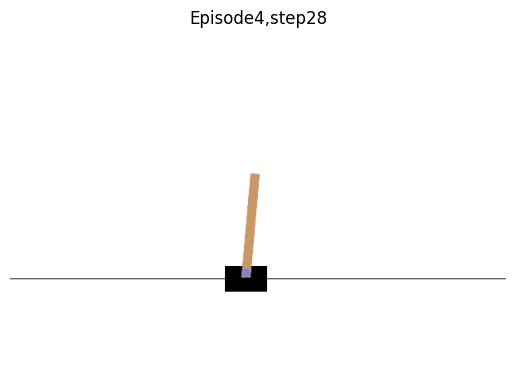

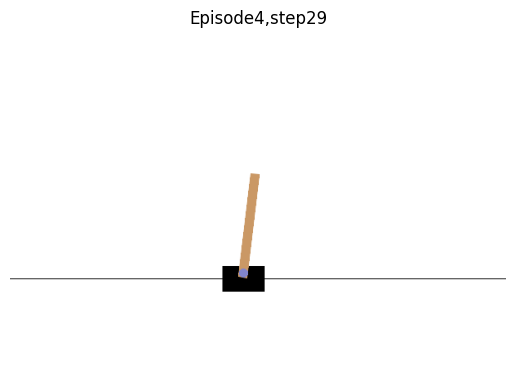

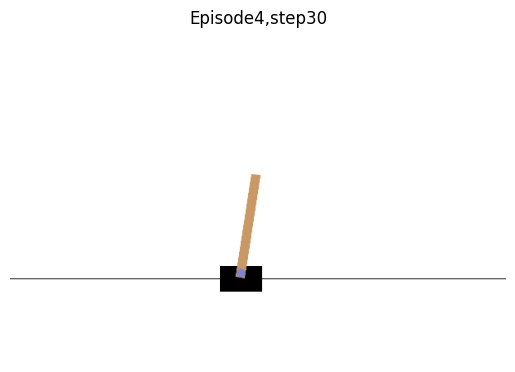

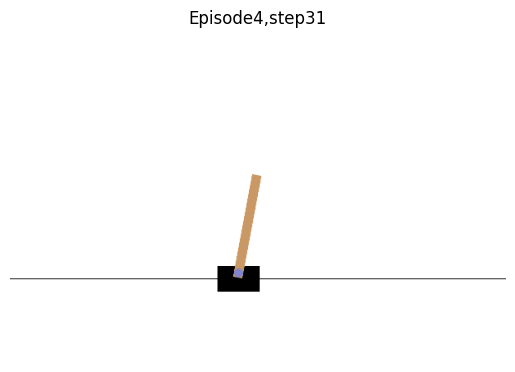

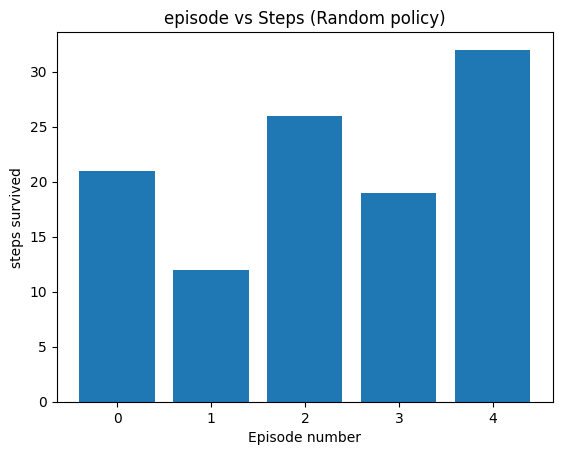

In [7]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

env=gym.make("CartPole-v1",render_mode="rgb_array")

episodenumber=5
timesteps=100
steps_per_episode=[]

for episode in range(episodenumber):
  step_count=0
  result=env.reset()#for initial state
  for t in range(timesteps):
    frame=env.render()
    frame=frame[0]
    frame=np.array(frame)#will take the entire of array of state
    plt.imshow(frame)
    plt.title(f"Episode{episode},step{t}")
    plt.axis("off")
    plt.show()

    step_result=env.step(env.action_space.sample())
    step_count+=1

    #handle gym old/new versions
    if len(step_result)==5:
      obs,reward,terminated,truncated,info=step_result
    else:
      obs,reward,done,info=step_result
      terminated,truncated=done,False
      #slow animation
    time.sleep(0.1)
    if terminated or truncated:
      break
  steps_per_episode.append(step_count)
env.close()
plt.bar(range(episodenumber),steps_per_episode)
plt.xlabel("Episode number")
plt.ylabel("steps survived")
plt.title("episode vs Steps (Random policy)")
plt.show()